In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import datetime
import warnings
from jupyterthemes import jtplot

In [2]:
from ali.ali_sw import *
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *

In [3]:
jtplot.style('default', grid=False)
plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 16
plt.rc('font', size= 16)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 15)

## Import data

In [4]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/**/*.xy'
files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if 'esther' in f and 'proc' not in f:
        files_new.append(f)
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/cookie_dip/20200219_ITO_DEA_esther_NaOH_BuOH/20200219_ITO_DEA_esther_NaOH_BuOH.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_esther/20200213_ITO_sputter_anneal/20200213_ITO_sputter_anneal.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_esther/20200214_ITO_DEA_esther_10min_sublim/20200214_ITO_DEA_esther_10min_sublim.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_esther/20200218_ITO_DEA_esther_10min_sublim/20200218_ITO_DEA_esther_10min_sublim.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_esther/20200218_ITO_DEA_esther_HeUV_45min/20200218_ITO_DEA_esther_HeUV_45min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_esther/20200218_ITO_DEA_esther_HeUV_45min_different_position/20200218_ITO_DEA_esther_HeUV_45min_different_position/20200218_ITO_DEA_esther_HeUV_45min_different_position.xy']

In [5]:
names = ['ester_naoh_buoh', 'reference_ITO_ester', 'ester_sublim_10nm', 'again_ester_sublim_10nm', 
         'ester_HeUV_45m', 'ester_HeUV_dif_pos']
label = ['DEA-ester Immersion, NaOH+BuOH cleaning', 'Reference ITO 2 cycles cleaning', 'Sublimation 10 nm DEA ester',
         'Sublimation 10 nm DEA ester (repeated)', 'Sublimated ester He UV 45 min radiation', 'He UV 45 min radiation (diff. position)']
experiments = [xps_data_import(path=f, name=n, label=l) for f,n,l in zip(files, names, label)]
experiments[0].name

'ester_naoh_buoh'

In [190]:
fref = '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/ITO_sputter_anneal/20200130_ITO_sputter_anneal1.xy'
name = 'acid_sublim_sput1'
label = 'acid_sublim_sput1'
experiments.append(xps_data_import(path=fref, name = name, label=label))

In [200]:
fref = '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/cookie_dip/2020_01_24_ITO_DEA_immersion/7_2020_01_28_ITO_DEA_10h_1uM_anneal_250grad/20200128_ITO_DEA_10h_1uM_anneal_250grad.xy'
name = 'acid_sublim_10m'
label = 'acid_sublim_10m'
experiments.append(xps_data_import(path=fref, name = name, label=label))

In [201]:
len(experiments)

8

In [21]:
experiments[0].dfx

range           overview             O1s            C1s        Sn3d5/2  \
properties        energy   counts energy  counts energy counts  energy   
0           1.200000e+03  21040.0  540.0  3736.8  295.0  729.5   502.0   
1           1.199000e+03  21290.0  539.9  3712.0  294.9  724.5   501.9   
2           1.198000e+03  21422.5  539.8  3762.4  294.8  717.5   501.8   
3           1.197000e+03  20885.0  539.7  3746.8  294.7  737.5   501.7   
4           1.196000e+03  21455.0  539.6  3764.4  294.6  731.5   501.6   
5           1.195000e+03  21375.0  539.5  3771.6  294.5  692.5   501.5   
6           1.194000e+03  21635.0  539.4  3686.8  294.4  714.0   501.4   
7           1.193000e+03  20960.0  539.3  3770.8  294.3  721.0   501.3   
8           1.192000e+03  21490.0  539.2  3767.6  294.2  726.0   501.2   
9           1.191000e+03  21282.5  539.1  3766.4  294.1  717.5   501.1   
10          1.190000e+03  21140.0  539.0  3800.8  294.0  722.0   501.0   
11          1.189000e+03  21070.0  538.9  3692.4  293.9  708.0   500.9   
12          1.188000e+03  20855.0  538.8  3786.8  293.8  690.5   500.8   
13          1.187000e+03  20650.0  538.7  3696.8  293.7  698.0   500.7   
14          1.186000e+03  20765.0  538.6  3715.6  293.6  717.5   500.6   
15          1.185000e+03  20525.0  538.5  3705.6  293.5  715.0   500.5   
16          1.184000e+03  20397.5  538.4  3717.2  293.4  742.5   500.4   
17          1.183000e+03  20537.5  538.3  3772.4  293.3  704.0   500.3   
18          1.182000e+03  20242.5  538.2  3626.4  293.2  723.0   500.2   
19          1.181000e+03  20182.5  538.1  3721.2  293.1  721.0   500.1   
20          1.180000e+03  20210.0  538.0  3724.0  293.0  735.5   500.0   
21          1.179000e+03  20015.0  537.9  3749.2  292.9  683.5   499.9   
22          1.178000e+03  20080.0  537.8  3686.8  292.8  704.5   499.8   
23          1.177000e+03  20162.5  537.7  3662.8  292.7  694.0   499.7   
24          1.176000e+03  19785.0  537.6  3722.8  292.6  696.0   499.6   
25          1.175000e+03  19802.5  537.5  3692.4  292.5  707.0   499.5   
26          1.174000e+03  19852.5  537.4  3714.0  292.4  700.0   499.4   
27          1.173000e+03  19367.5  537.3  3658.8  292.3  739.0   499.3   
28          1.172000e+03  19647.5  537.2  3686.4  292.2  681.0   499.2   
29          1.171000e+03  19415.0  537.1  3643.6  292.1  681.0   499.1   
...                  ...      ...    ...     ...    ...    ...     ...   
1175        2.500000e+01   1427.5    NaN     NaN    NaN    NaN     NaN   
1176        2.400000e+01   1300.0    NaN     NaN    NaN    NaN     NaN   
1177        2.300000e+01   1485.0    NaN     NaN    NaN    NaN     NaN   
1178        2.200000e+01   1567.5    NaN     NaN    NaN    NaN     NaN   
1179        2.100000e+01   2467.5    NaN     NaN    NaN    NaN     NaN   
1180        2.000000e+01   4530.0    NaN     NaN    NaN    NaN     NaN   
1181        1.900000e+01   6885.0    NaN     NaN    NaN    NaN     NaN   
1182        1.800000e+01   6055.0    NaN     NaN    NaN    NaN     NaN   
1183        1.700000e+01   2645.0    NaN     NaN    NaN    NaN     NaN   
1184        1.600000e+01   1165.0    NaN     NaN    NaN    NaN     NaN   
1185        1.500000e+01    800.0    NaN     NaN    NaN    NaN     NaN   
1186        1.400000e+01    730.0    NaN     NaN    NaN    NaN     NaN   
1187        1.300000e+01    652.5    NaN     NaN    NaN    NaN     NaN   
1188        1.200000e+01    695.0    NaN     NaN    NaN    NaN     NaN   
1189        1.100000e+01    662.5    NaN     NaN    NaN    NaN     NaN   
1190        1.000000e+01    887.5    NaN     NaN    NaN    NaN     NaN   
1191        9.000000e+00   1132.5    NaN     NaN    NaN    NaN     NaN   
1192        8.000000e+00   1150.0    NaN     NaN    NaN    NaN     NaN   
1193        7.000000e+00   1025.0    NaN     NaN    NaN    NaN     NaN   
1194        6.000000e+00    890.0    NaN     NaN    NaN    NaN     NaN   
1195        5.000000e+00    740.0    NaN     NaN    NaN    NaN     NaN   
1196

In [68]:
#experiments[6].dfx.rename(columns={'overview' :'overview_'}, inplace=True)
#experiments[7].dfx.rename(columns={'overview' :'overview_'}, inplace=True)

# Pre-treatment

## Substract all backgrounds 

### In 

In [192]:
region = 'In3d5/2'

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


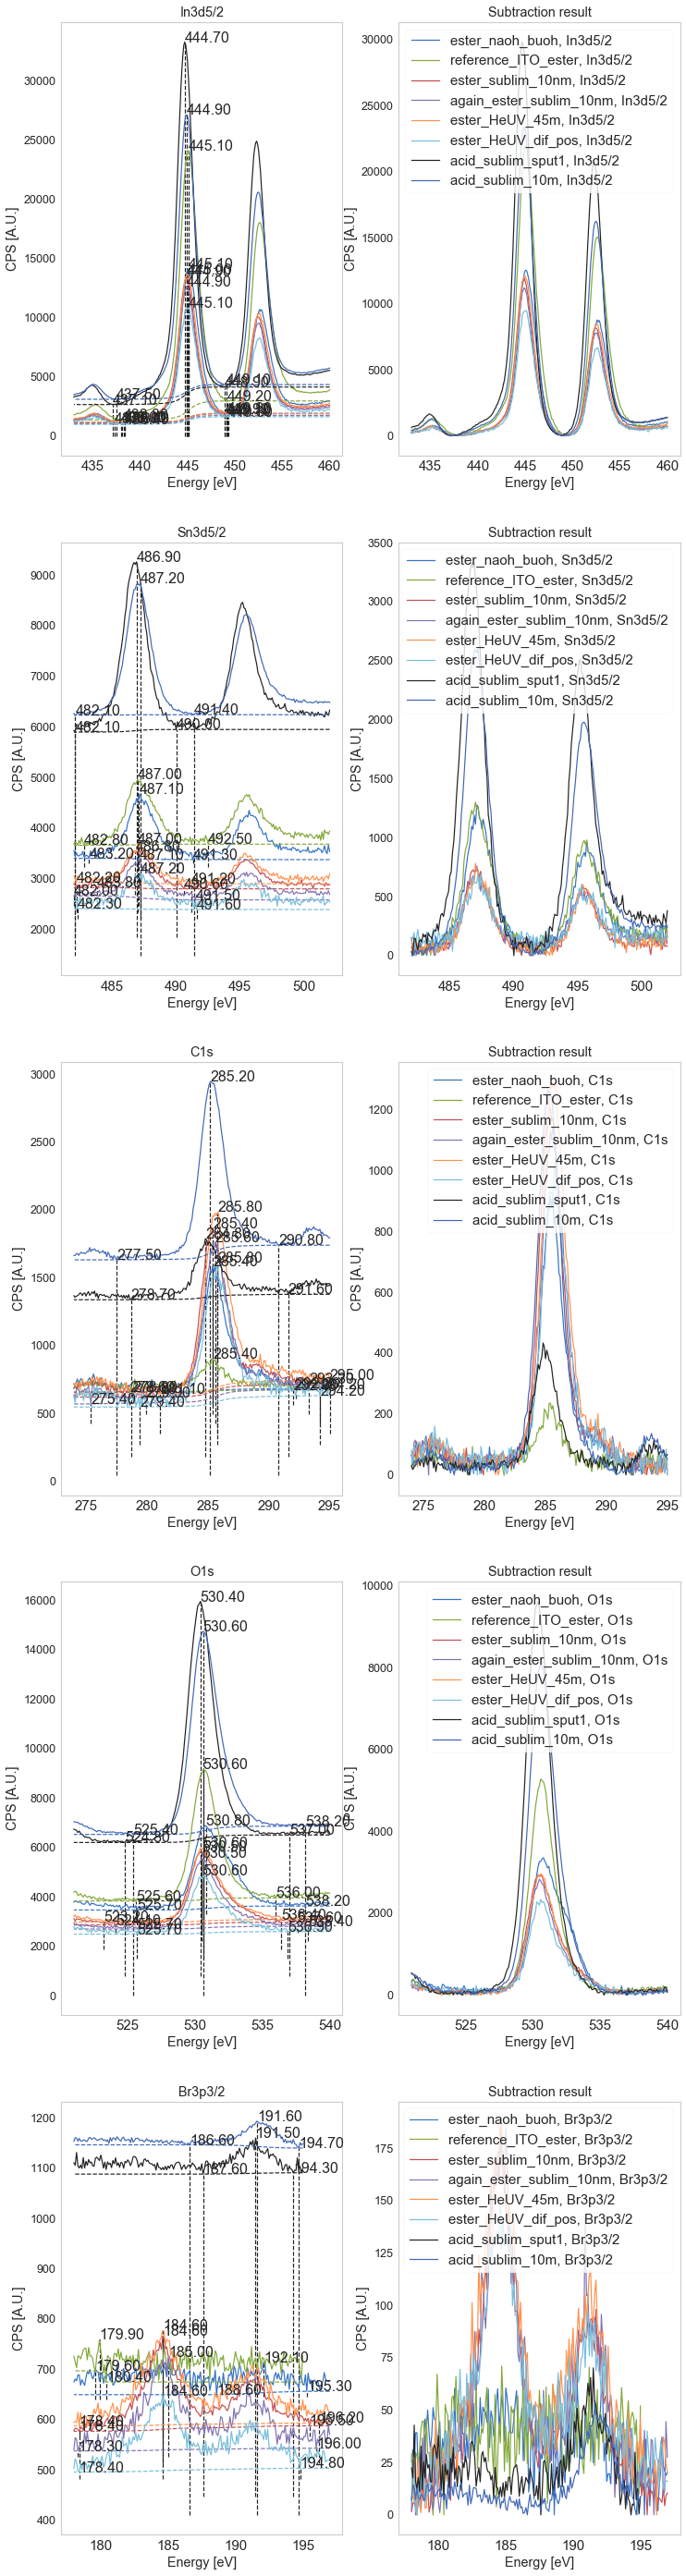

In [202]:
regions = ['In3d5/2', 'Sn3d5/2', 'C1s', 'O1s', 'Br3p3/2']
bg_exps = bulk_bg_subtract(experiments, regions)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Max iterations exceeded, subtract linear baseline


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


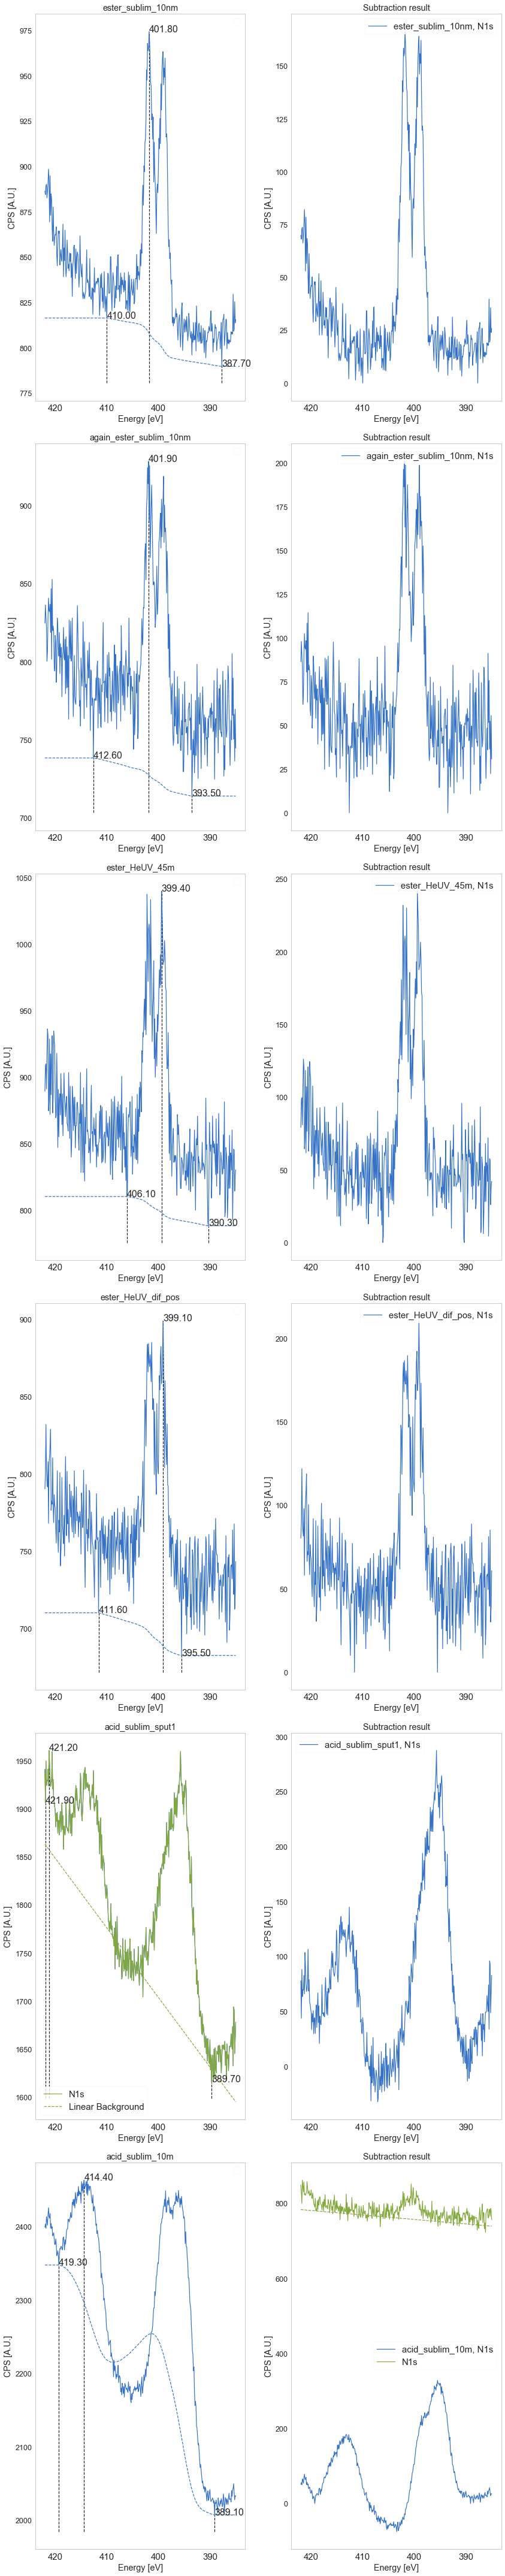

In [203]:
bg_exps[2:] = region_bg_subtract(bg_exps[2:], 'N1s')
bg_exps[0] = subtract_linear_bg(bg_exps[0], 'N1s')

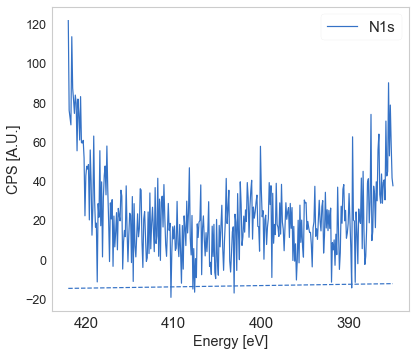

In [205]:
bg_exps[1] = subtract_linear_bg(bg_exps[1], 'N1s')

## Find hard shift and scaling factor in substrate (ref)

In [206]:
region = 'In3d5/2'

#### Apply Shift and scaling factor to all region for each experiment

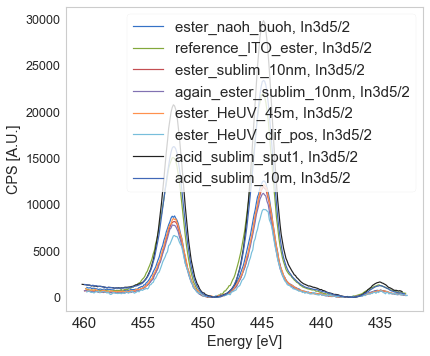

In [207]:
shifted_exps = []
for xp in bg_exps:
    shift = find_shift(xp, bg_exps[7], region = region)
    xp_sh = align_dfx(xp, shift)
    plot_region(xp_sh, region)
    shifted_exps.append(xp_sh)
cosmetics_plot()

In [32]:
for xp in shifted_exps:
    shift = find_shift(xp, bg_exps[2], region = region)
    assert shift == 0, 'Shift found again'

AssertionError: Shift found again

## Scale spectra

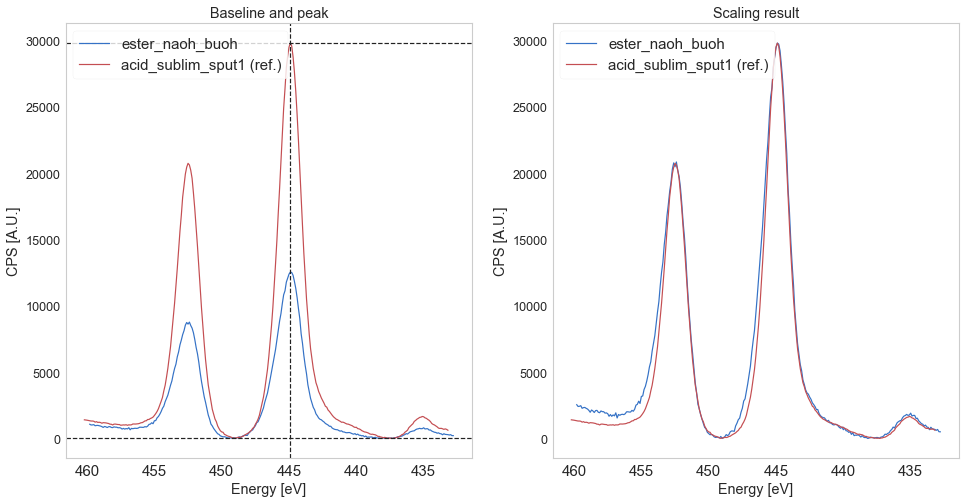

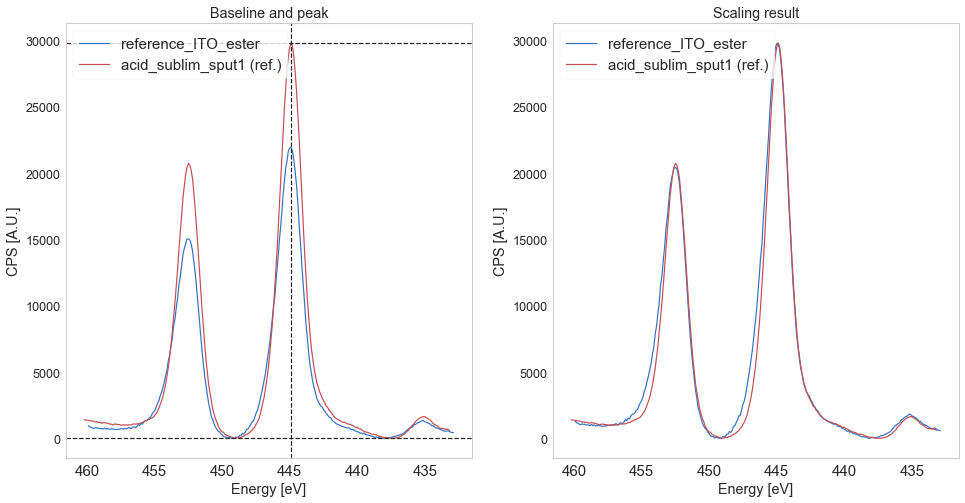

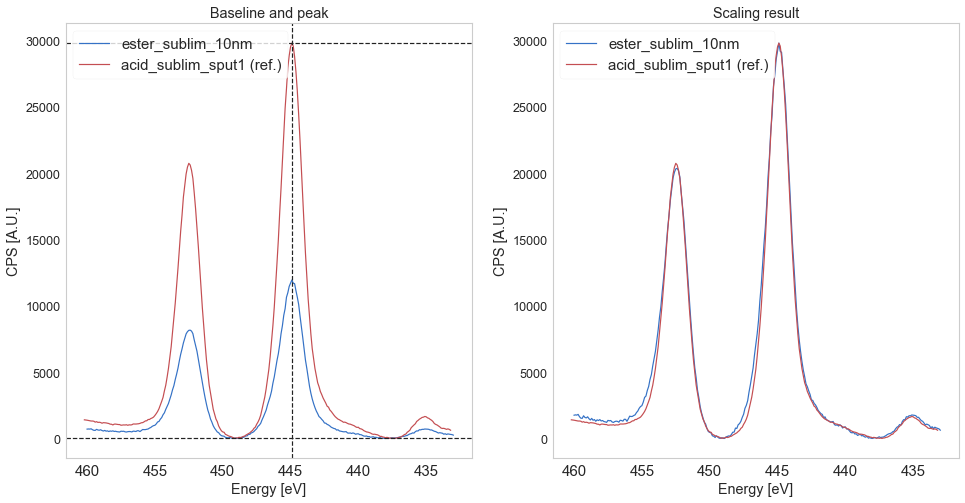

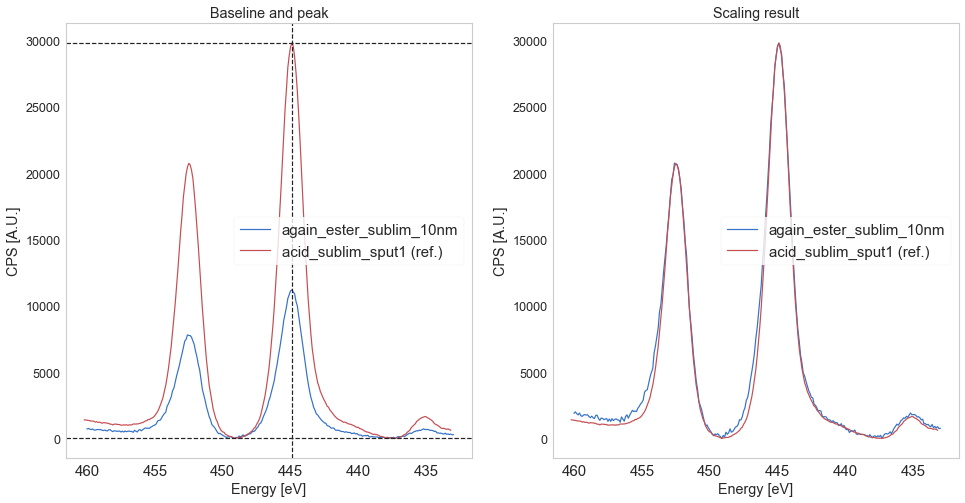

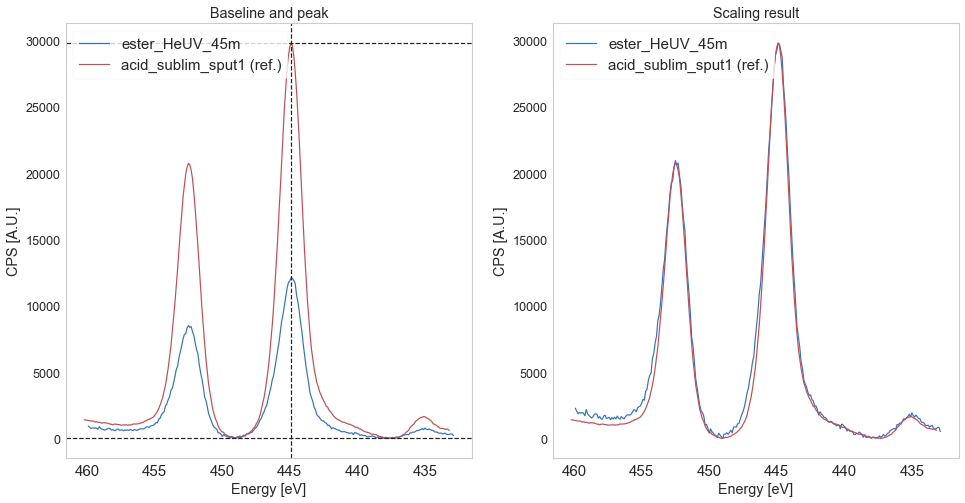

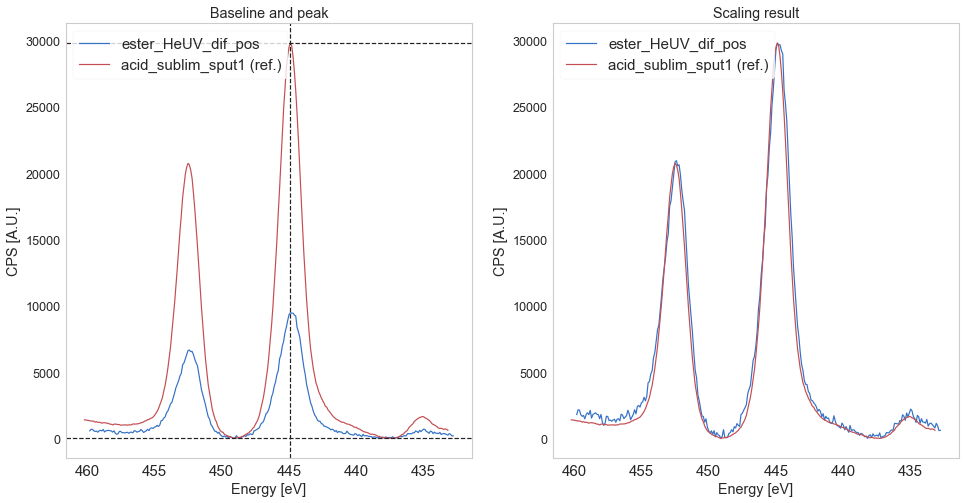

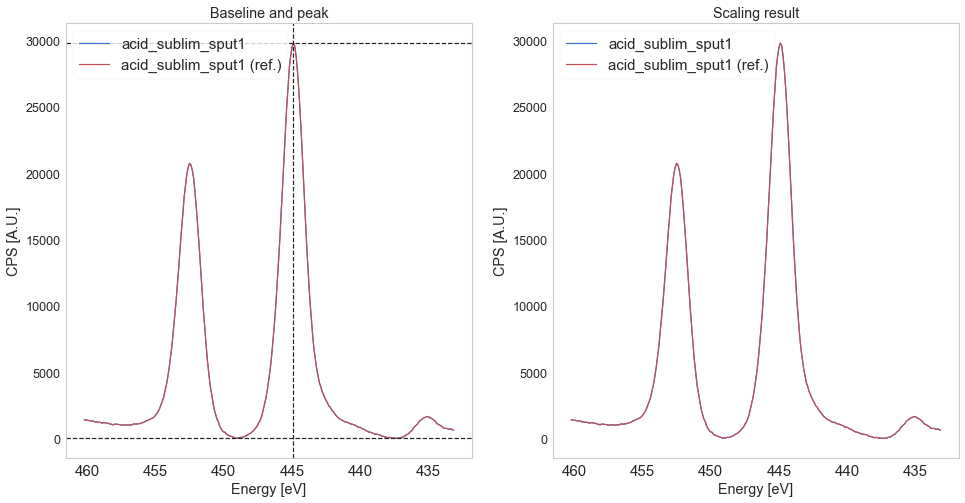

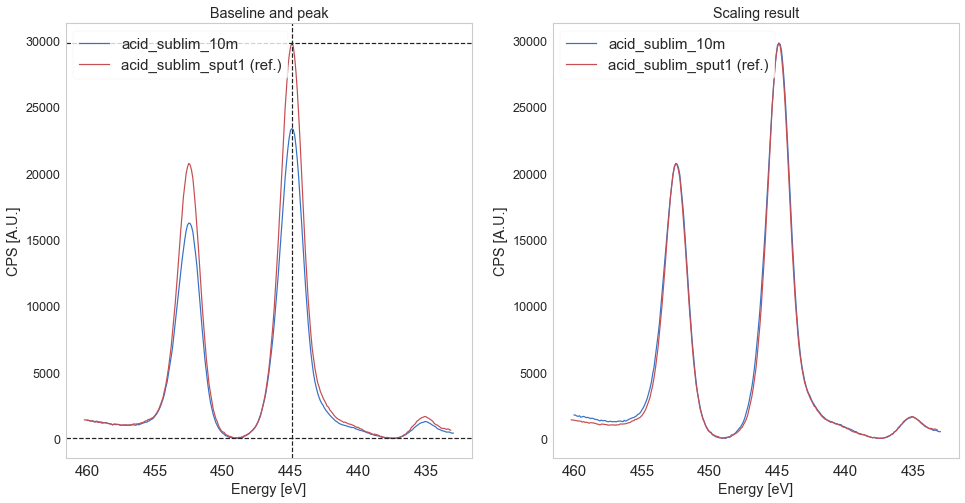

In [208]:
scaled_exps = []
for xp in shifted_exps:
    scale = scale_and_plot_spectra(xp = xp, xpRef = shifted_exps[6], region = 'In3d5/2')
    scaled_exps.append(scale_dfx(xp = xp, scale_factor = scale))

### Check scaling in remaining regions

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'Before processing')

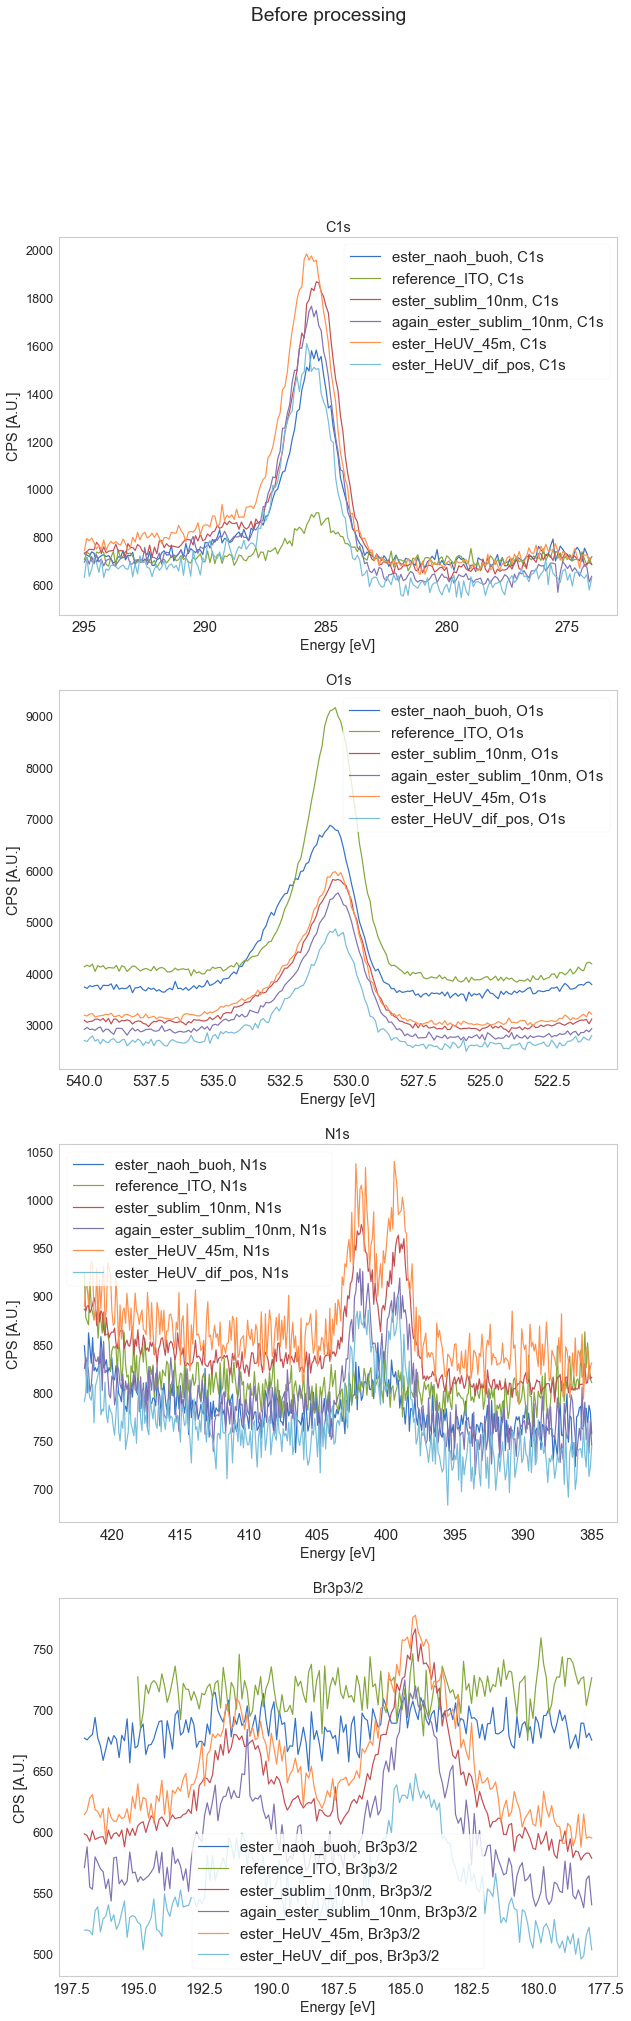

In [88]:
regions = ['C1s', 'O1s', 'N1s', 'Br3p3/2']
fig, ax = plt.subplots(len(regions), figsize=(10, 8 * len(regions)))
for i, r in enumerate(regions):
    for xp in experiments:
        plot_region(xp, r, ax=ax[i])
    cosmetics_plot(ax = ax[i])
    ax[i].set_title(r)
plt.suptitle('Before processing')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'After shifting and scaling')

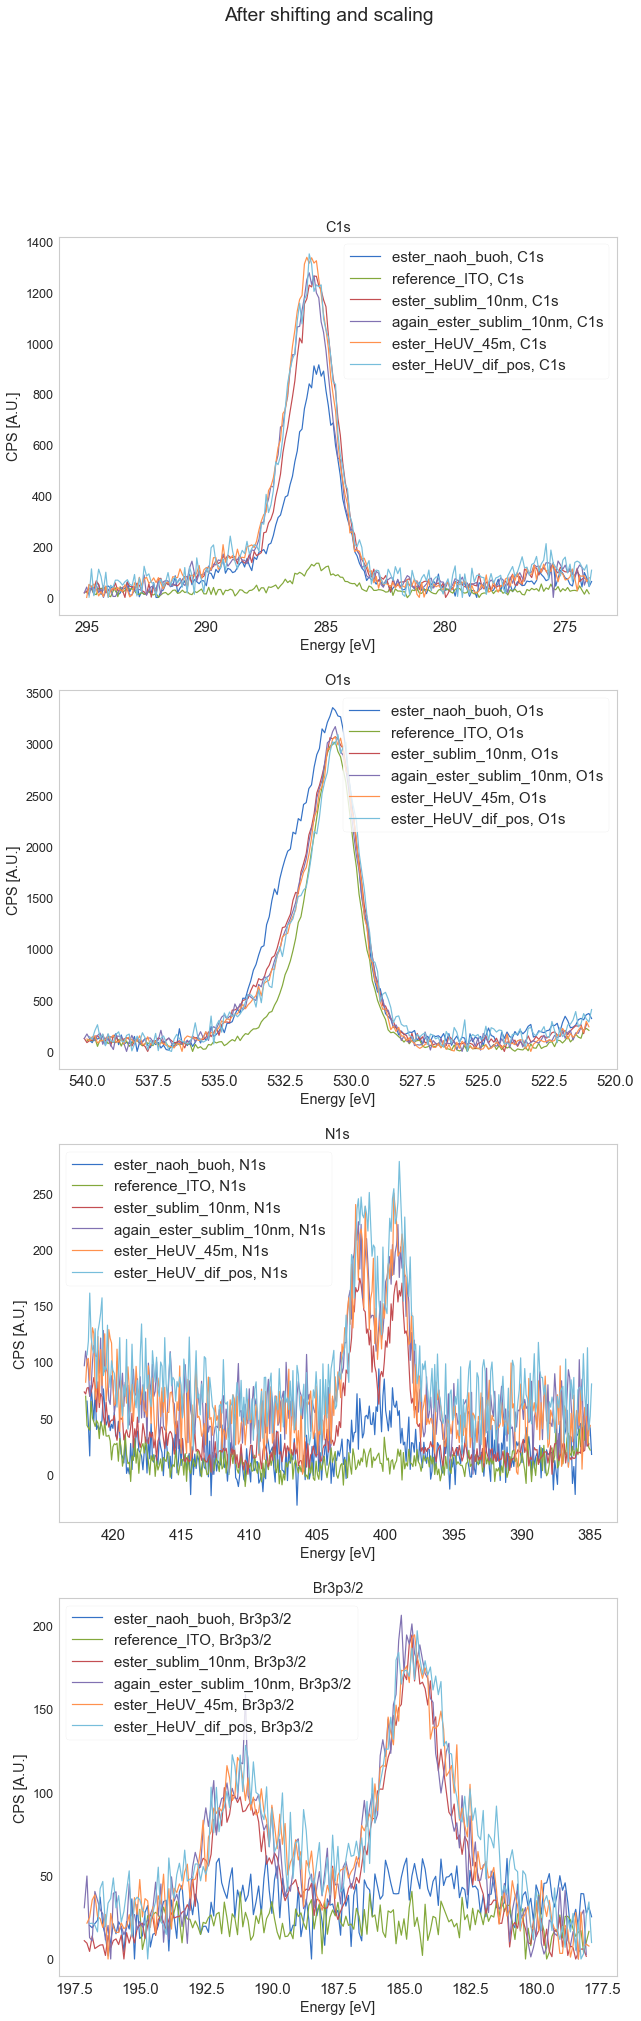

In [40]:
regions = ['C1s', 'O1s', 'N1s', 'Br3p3/2']
fig, ax = plt.subplots(len(regions), figsize=(10, 8 * len(regions)))
for i, r in enumerate(regions):
    for xp in scaled_exps:
        plot_region(xp, r, ax=ax[i])
    cosmetics_plot(ax = ax[i])
    ax[i].set_title(r)
plt.suptitle('After shifting and scaling')

## Store treated spectra group

In [209]:
import os
for xp in scaled_exps:
    filepath, filename = os.path.split(xp.path)
    newpath = filepath + '/proc/'
    try:
        os.mkdir(newpath)
    except FileExistsError: pass
    
    write_processed_xp(newpath + filename, xp)

# Read stored spectra group

In [6]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/**/*.xy'
files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if '/proc' in f:
        files_new.append(f)
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/cookie_dip/20200210_ITO_DEA_alcohol_naoh_buoh/proc/20200210_ITO_DEA_alcohol_naoh_buoh.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/cookie_dip/20200211_ITO_DEA_acid_naoh_buoh/proc/20200211_ITO_DEA_acid_naoh_buoh.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/cookie_dip/20200219_ITO_DEA_esther_NaOH_BuOH/proc/20200219_ITO_DEA_esther_NaOH_BuOH.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/cookie_dip/2020_01_24_ITO_DEA_immersion/6_2020_01_24_ITO_DEA_16h_1uM/proc/20200124_ITO_DEA_10h_1uM.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/cookie_dip/2020_01_24_ITO_DEA_immersion/7_2020_01_28_ITO_DEA_10h_1uM_anneal_250grad/proc/20200128_ITO_DEA_10h_1uM_anneal_250grad.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/ITO_DEA_acid_10min_sublim/proc/20200131_ITO_DEA_acid_10min_sublim.xy',
 '/Users/pabloherrero/sabat/xps_spectra/ITO_DEA/sublim/ITO_DEA_acid/ITO_sputter_anneal/proc/20200130_ITO_sputter_annea

In [12]:
scaled_exps = []
for f in files:
    scaled_exps.append(read_processed_xp(f))
scaled_exps[0].name

'alcohol_naoh_buoh'

In [42]:
for xp in scaled_exps:
    print(xp.name)

ester_naoh_buoh
reference_ITO
ester_sublim_10nm
again_ester_sublim_10nm
ester_HeUV_45m
ester_HeUV_dif_pos


## Filter out cleaning experiments

In [46]:
main_exps = scaled_exps[:3]+[scaled_exps[4]]

In [47]:
[xp.name for xp in main_exps]

['ester_naoh_buoh', 'reference_ITO', 'ester_sublim_10nm', 'ester_HeUV_45m']

## Split acid and alcohol experiments

In [53]:
acid_exps, oh_exps = [], []
for xp in main_exps:
    if 'acid' in xp.name:
        acid_exps.append(xp)
    else:
        oh_exps.append(xp)
# scaled_exps = main_exps

In [54]:
acid_exps.pop(2)
[xp.name for xp in acid_exps], [xp.name for xp in oh_exps]

(['acid_immersion_NaOH_BuOH', 'acid_immersion_plasma_1uM', 'acid_sublim_10m'],
 ['alcohol_immersion_NaOH_BuOH', 'Reference ITO', 'alcohol_sublim_12m'])

In [55]:
acid_exps[1].name = 'acid_immersion_plasma_1uM'
acid_exps[0].name = 'acid_immersion_NaOH_BuOH'

In [56]:
[xp.name for xp in oh_exps]
oh_exps[0].name = 'alcohol_immersion_NaOH_BuOH'

In [57]:
[xp.name for xp in acid_exps], [xp.name for xp in oh_exps]

(['acid_immersion_NaOH_BuOH', 'acid_immersion_plasma_1uM', 'acid_sublim_10m'],
 ['alcohol_immersion_NaOH_BuOH', 'Reference ITO', 'alcohol_sublim_12m'])

# Integrate areas 

## In 3d

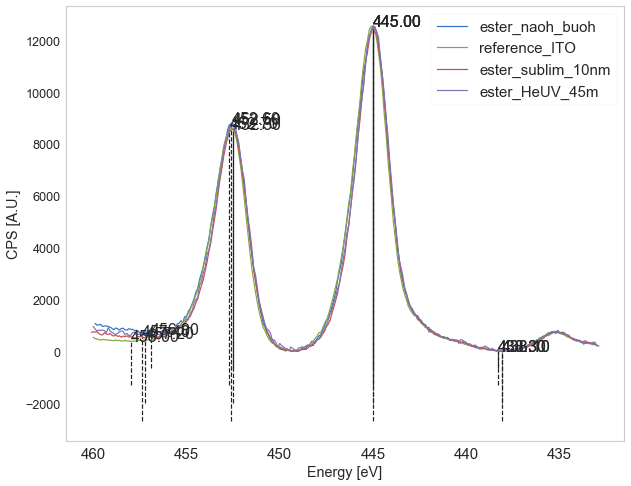

In [51]:
region = 'In3d5/2'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(main_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=-1))
cosmetics_plot()

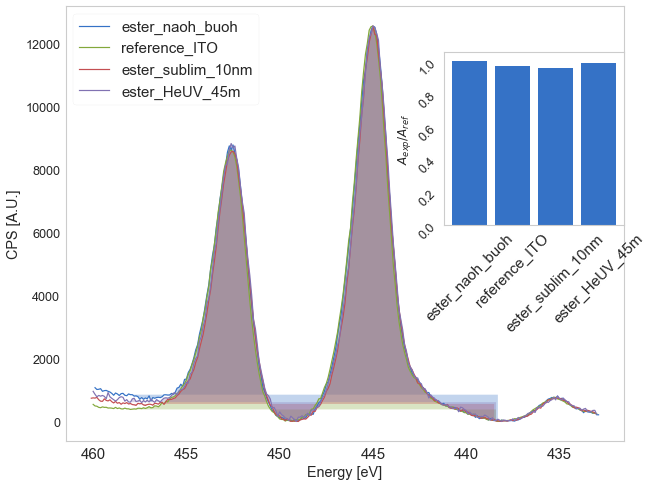

In [53]:
plt.figure(figsize=(10,8))
area_rel, names = [], []
area_in = []
for j,xp in enumerate(main_exps):
    area = compare_areas(main_exps[0], xp, region, lmidx=ind[1][2], rmidx=ind[1][3])
    area_rel.append(area[0])
    area_in.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
inset_rel_areas(area_rel, names)

##  Sn 3d

In [98]:
region = 'Sn3d5/2'

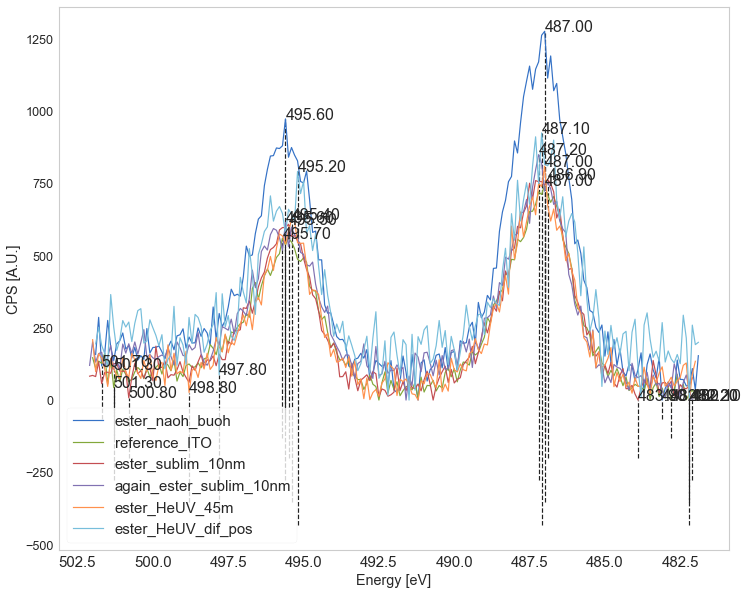

In [101]:
region = 'Sn3d5/2'
plt.figure(figsize=(12, 10))
ind = []
for j, xp in enumerate(scaled_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=-1))
# plt.xlim(493, 483)
cosmetics_plot()

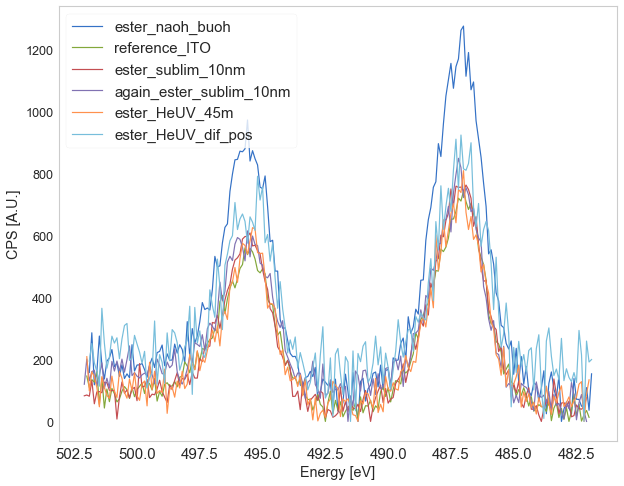

In [104]:
plt.figure(figsize=(10,8))
area_rel, names = [], []
area_sn = []
for j,xp in enumerate(scaled_exps):
    area = compare_areas(scaled_exps[5], xp, region, lmidx=ind[1][2], rmidx=ind[1][2])
    area_rel.append(area[0])
    area_sn.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
# inset_rel_areas(area_rel, names)

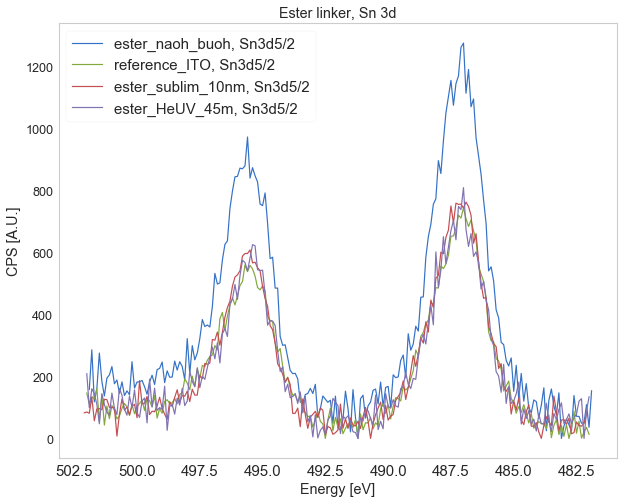

In [107]:
plt.figure(figsize=(10,8))

for j,xp in enumerate(main_exps):
    plot_region(xp, region)
plt.title('Ester linker, Sn 3d')
# plt.xlim(805, 760)
cosmetics_plot()
# inset_rel_areas(area_rel, names)

## C1s 

In [52]:
e0 = scaled_exps[1].dfx[region].energy.head(1)
indrop = np.where(scaled_exps[0].dfx[region].energy.values > e0.values)[0]
scaled_exps[0].dfx[region] = scaled_exps[0].dfx[region].dropna().drop(indrop).reset_index(drop=True)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


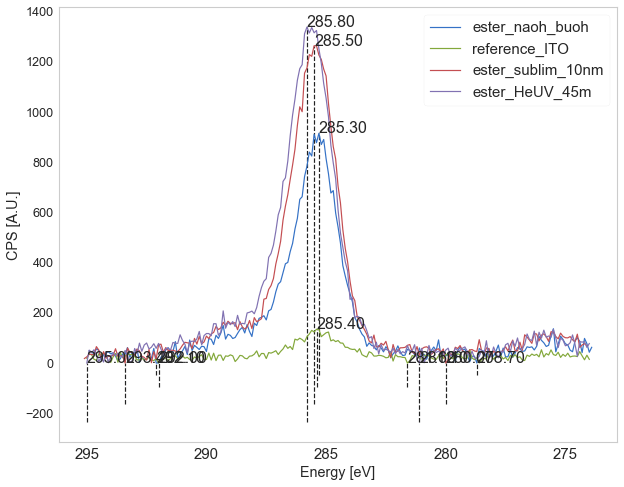

In [110]:
region = 'C1s'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(main_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=0))
cosmetics_plot()

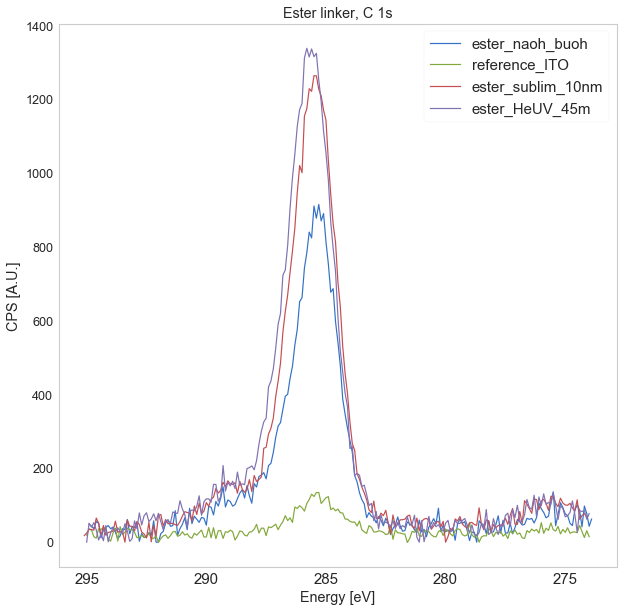

In [112]:
plt.figure(figsize=(10,10))
area_rel, names = [], []
area_c = []
for j,xp in enumerate(main_exps):
    area = compare_areas(main_exps[0], xp, region, lmidx=ind[1][1], rmidx=ind[1][1])
    area_rel.append(area[0])
    area_c.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
plt.title('Ester linker, C 1s')
cosmetics_plot()
# inset_rel_areas(area_rel, names)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Alcohol linker, C 1s')

<Figure size 720x576 with 0 Axes>

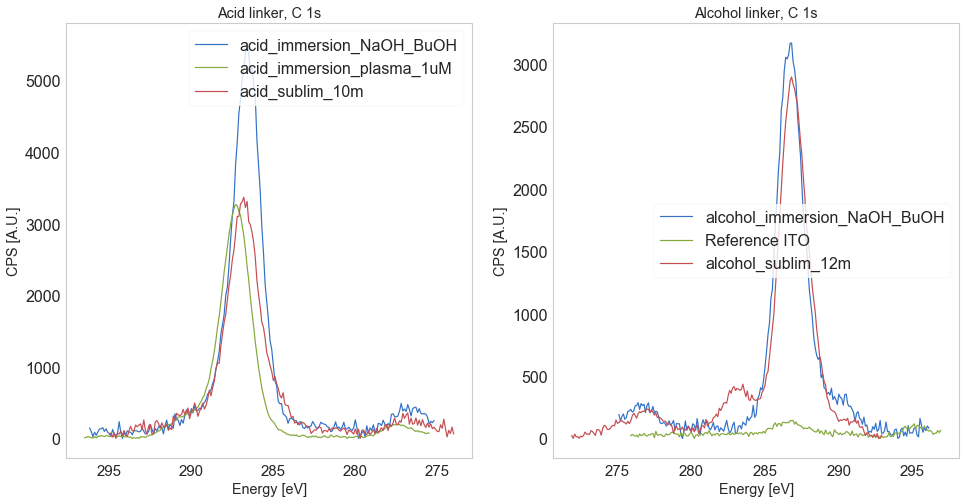

In [214]:
region = 'C1s'
plt.figure(figsize=(10,8))
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
for j,xp in enumerate(acid_exps):
    plot_region(xp, region, lb=xp.name,ax=ax[0])
cosmetics_plot(ax=ax[0])
ax[0].set_title('Acid linker, C 1s')

for j,xp in enumerate(oh_exps):
    plot_region(xp, region, lb=xp.name, ax=ax[1])
ax[1].set_title('Alcohol linker, C 1s')
    
# cosmetics_plot(ax=ax[1])
# inset_rel_areas(area_rel, names)

## O 1s

In [87]:
e0 = experiments[1].dfx[region].energy.head(1)
indrop = np.where(experiments[0].dfx[region].energy.values > e0.values)[0]
experiments[0].dfx[region] = experiments[0].dfx[region].drop(indrop)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [55]:
e0 = scaled_exps[1].dfx[region].energy.head(1)
indrop = np.where(scaled_exps[0].dfx[region].energy.values > e0.values)[0]
scaled_exps[0].dfx[region] = scaled_exps[0].dfx[region].dropna().drop(indrop).reset_index(drop=True)

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


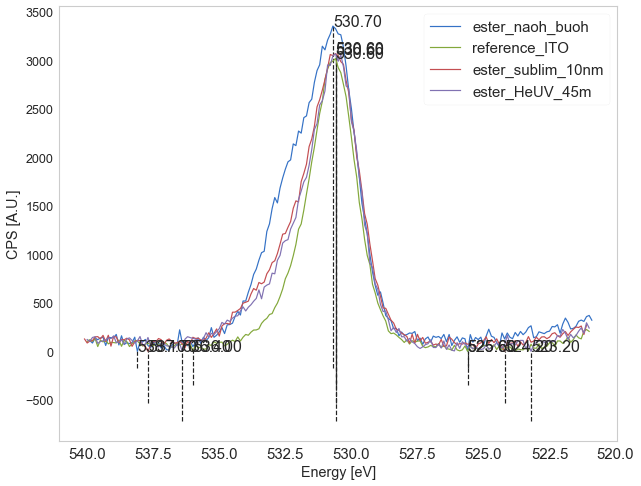

In [114]:
region = 'O1s'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(main_exps):
    ind.append(flexible_integration_limits(xp, region, doublePeak=0))
cosmetics_plot()

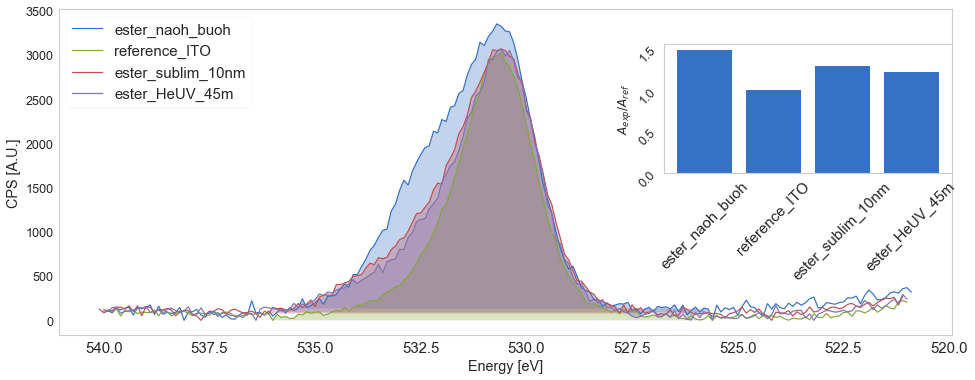

In [67]:
plt.figure(figsize=(16,6))
area_rel, names = [], []
area_o = []
for j,xp in enumerate(main_exps):
    area = compare_areas(main_exps[1], xp, region, lmidx=ind[1][1], rmidx=ind[0][2])
    area_rel.append(area[0])
    area_o.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
inset_rel_areas(area_rel, names)

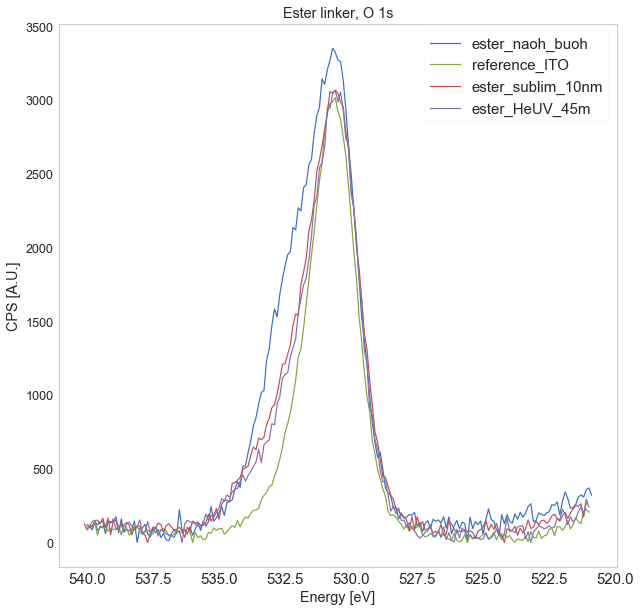

In [116]:
plt.figure(figsize=(10,10))

for j,xp in enumerate(main_exps):
    plot_region(xp, region, lb=xp.name)
# plt.xlim(805, 760)
plt.title('Ester linker, O 1s')
cosmetics_plot()
# inset_rel_areas(area_rel, names)

#### Normalize intensities -> find components

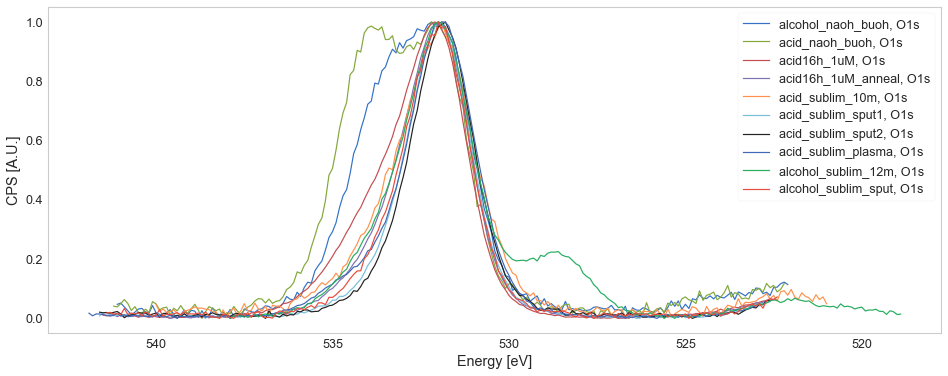

In [194]:
plt.figure(figsize=(16,6))
# area_rel, names = [], []
# area_o = []
for j,xp in enumerate(shifted_exps):
    norm = normalise_dfx(xp, region)# lmidx=ind[1][1], rmidx=ind[0][2])
    plot_region(norm, region)
#     area_o.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
# inset_rel_areas(area_rel, names)

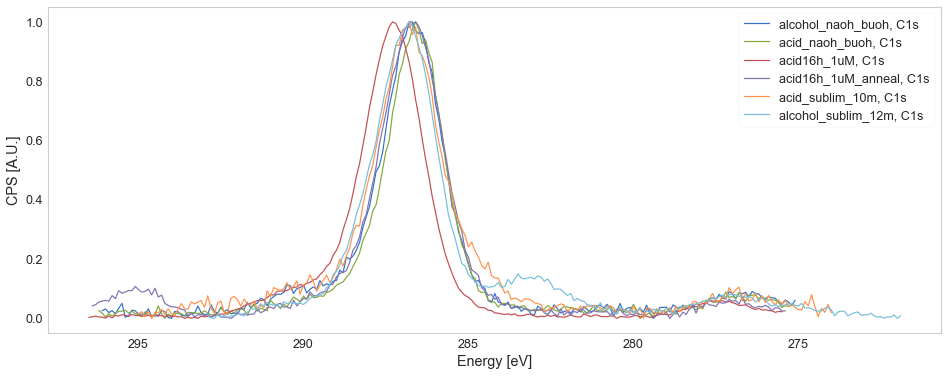

In [197]:
plt.figure(figsize=(16,6))
# area_rel, names = [], []
# area_o = []
for j,xp in enumerate(scaled_exps):
    norm = normalise_dfx(xp, 'C1s')# lmidx=ind[1][1], rmidx=ind[0][2])
    plot_region(norm, 'C1s')
#     area_o.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
# inset_rel_areas(area_rel, names)

## Br 3p

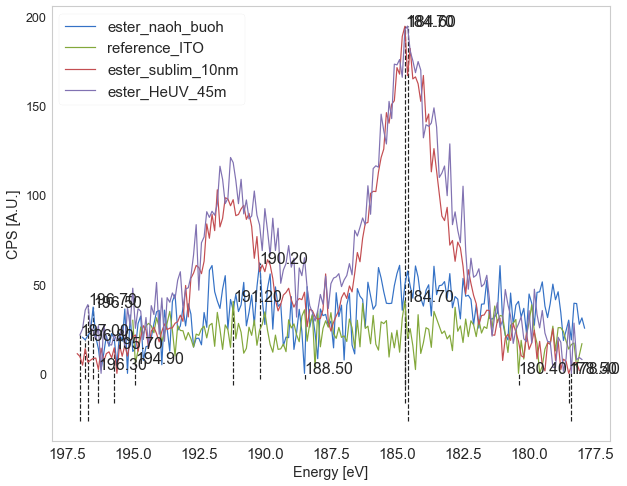

In [68]:
region = 'Br3p3/2'
plt.figure(figsize=(10, 8))
ind = []
for j, xp in enumerate(main_exps):
    try:
        ind.append(flexible_integration_limits(xp, region, doublePeak=-1))
    except ValueError:
        ind.append(flexible_integration_limits(xp, region, doublePeak = 0))
cosmetics_plot()

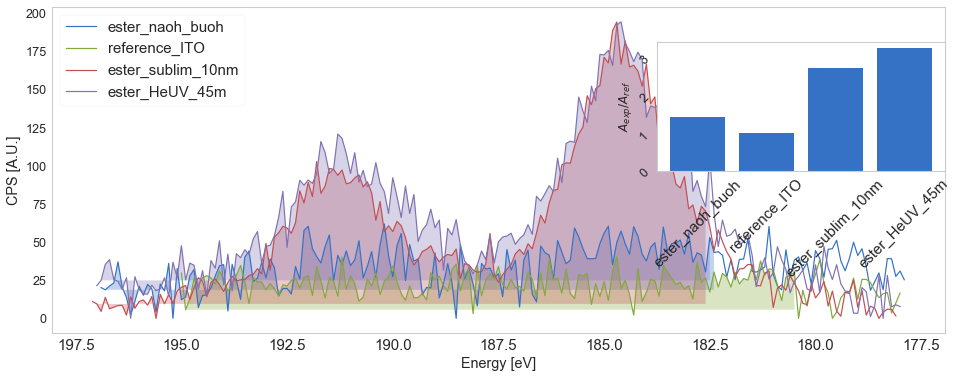

In [70]:
plt.figure(figsize=(16,6))
area_rel, names = [], []
area_br = []
for j,xp in enumerate(main_exps):
    area = compare_areas(main_exps[1], xp, region, 
                         lmidx=ind[1][2], rmidx=ind[1][3])
    area_rel.append(area[0])
    area_br.append(area[1])
    names.append(xp.name)
# plt.xlim(805, 760)
cosmetics_plot()
inset_rel_areas(area_rel, names)

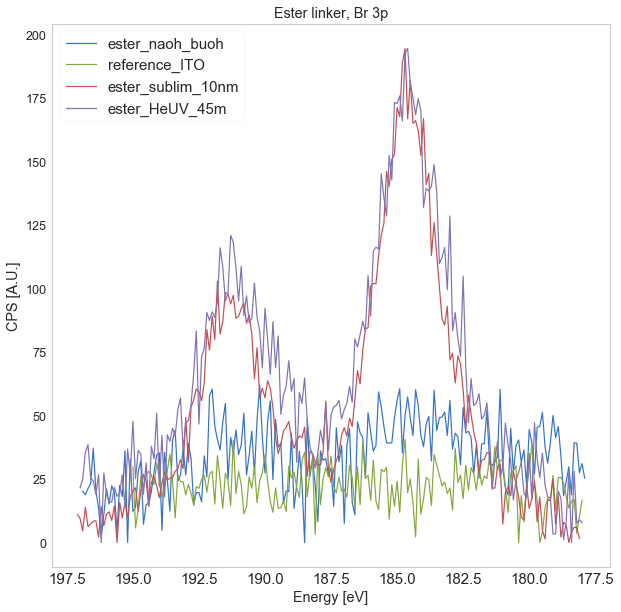

In [119]:
region = 'Br3p3/2'
plt.figure(figsize=(10,10))

for j,xp in enumerate(main_exps):
    plot_region(xp, region, lb=xp.name)
# plt.xlim(805, 760)
plt.title('Ester linker, Br 3p')
cosmetics_plot()
# inset_rel_areas(area_rel, names)

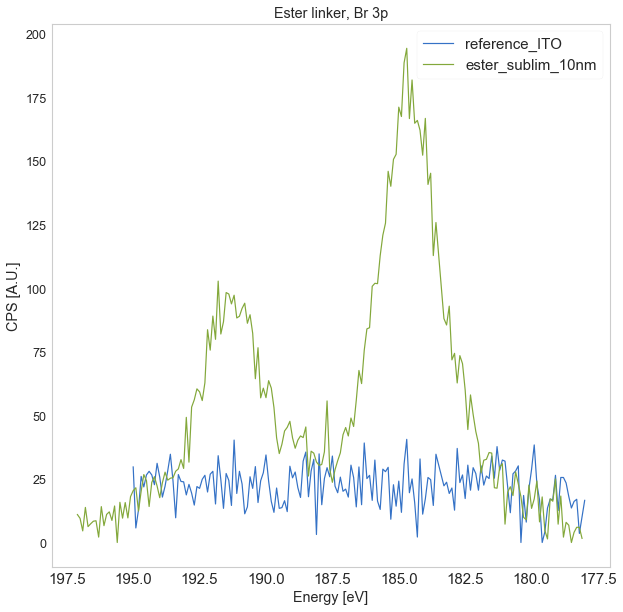

In [136]:
region = 'Br3p3/2'
plt.figure(figsize=(10,10))

for j,xp in enumerate(main_exps[1:3]):
    plot_region(xp, region, lb=xp.name)
# plt.xlim(805, 760)
plt.title('Ester linker, Br 3p')

cosmetics_plot()
# inset_rel_areas(area_rel, names)

## N 1s (not visible: Mo)

In [26]:
def crop_spectrum(xp : XPS_experiment, xpRef : XPS_experiment, region, inplace : bool = False) -> XPS_experiment:
    """Crop spectra with different bounds so that they coincide with xpRef
    xpRef should have the shortest spectrum on both ends"""
    e0 = xpRef.dfx[region].energy.head(1)
    indrop = np.where(xp.dfx[region].energy.values > e0.values)[0]
    dfnew = xp.dfx[region].dropna().drop(indrop).reset_index(drop=True)

    if inplace:
        xp.dfx[region] = dfnew
        return xp
    else:
        xpNew = deepcopy(xp)
        xpNew.dfx[region] = dfnew
    return xpNew

In [27]:
crop_exps= []
for xp in scaled_exps:
    crop_exps.append(crop_spectrum(xp = xp, xpRef = scaled_exps[2], region = 'N1s'))

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


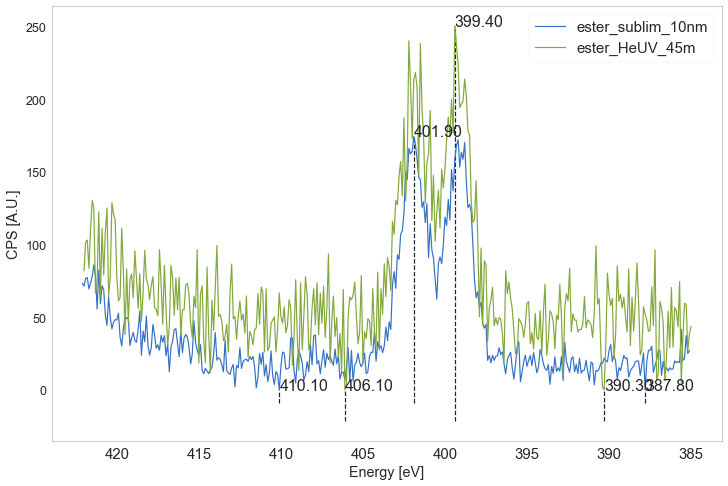

In [74]:
region = 'N1s'
plt.figure(figsize=(12, 8))
ind = []
for j, xp in enumerate(main_exps[2:]):
    ind.append(flexible_integration_limits(xp, region, doublePeak=0))
cosmetics_plot()

In [77]:
ind

[[202, 120, 343], [226, 159, 317]]

In [31]:
indmax = ind[0][0]
x = crop_exps[5].dfx[region].dropna().energy
x[indmax]
rm = np.argmin(abs(x[indmax:indmax+20] - np.min(x[indmax:indmax+20])))
x[ind[0][1]], x[rm]

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


(405.2000000000001, 399.2000000000001)

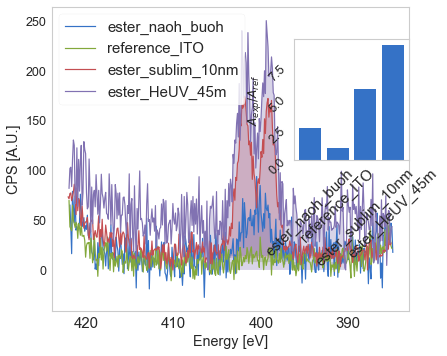

In [79]:
# plt.figure(figsize=(16,6))
area_rel, names = [], []
area_n = []
for j,xp in enumerate(main_exps):
    area = compare_areas(main_exps[1], xp, region, lmidx=ind[1][1], rmidx=ind[1][2])
    area_rel.append(area[0])
    area_n.append(area[1])
    names.append(xp.name)
# plt.xlim(x[ind[0][1]], x[rm])
cosmetics_plot()
inset_rel_areas(area_rel, names)

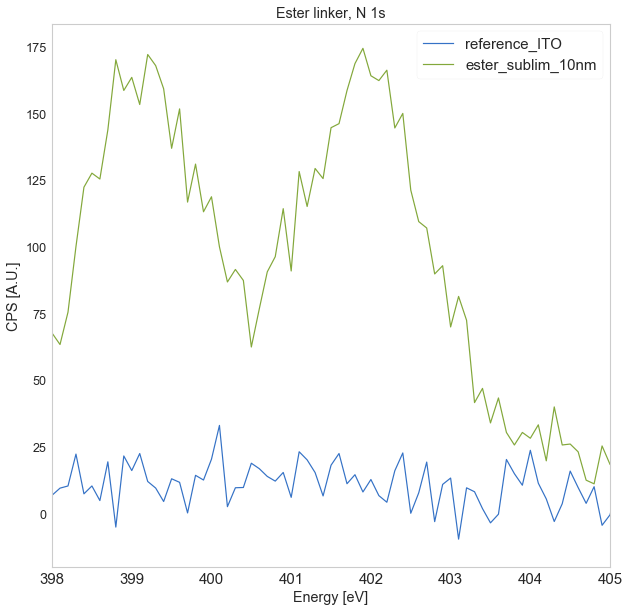

In [134]:
region = 'N1s'
plt.figure(figsize=(10,10))

for j,xp in enumerate(main_exps[1:3]):
    plot_region(xp, region, lb=xp.name)
# plt.xlim(805, 760)
plt.title('Ester linker, N 1s')
plt.xlim(405, 398)

cosmetics_plot()
# inset_rel_areas(area_rel, names)

In [121]:
@dataclass
class XPS_experiment:
    """XPS dataclass with regions dfx and metadata
    Attrs:
    -------
    dfx : pd.DataFrame
        table containing all regions found in .xy file
    delimiters : tuple
        position, extension and name of each region to correctly import dfx
    name : str = None
        short name to reference the experiment
    label : str = None
        longer description of the experiment (cleaning, preparation conditions...)
    date : str = None
        experiment date as read in the filename
    other_meta : str = None
        other info contained in the filename
    """
    path : str = None
    delimiters : tuple = None
    name : str = None
    label : str = None
    date : str = None
    other_meta : str = None
    dfx : pd.DataFrame = None
    areas : dict = None

In [123]:
xptest = deepcopy(main_exps[0])

In [127]:
xptest.areas = {'C' : area_c[0]}
xptest.areas['C']

0.0

# Stoichiometry (unscaled)

In [87]:
area_c, area_o

([2571.02424317042, 471.5381400799308, 3588.5760625629814, 3873.8969701969095],
 [11133.836044365818, 7540.224706587412, 9628.93502374315, 9096.235657715248])

In [82]:
asf = dict({'C' : 0.296, 'O' : 0.711, 'N' : 0.477, 'In' : 4.359, 'Sn' : 4.725, 'Br' : 1.053})
print('Relative abundance | C/O | In/Sn | In/O | In/C | ')
for i in range(len(main_exps)):
    print('| ', main_exps[i].name, '| %.1f | %.1f | %.1f | %.1f |' %(area_c[i]*asf['O'] / (area_o[i]*asf['C'])  , 
          area_in[i]*asf['Sn'] / (area_sn[i]*asf['In']), 
          area_in[i]*asf['O'] / (area_o[i]*asf['In']) , 
          area_in[i]*asf['C'] / (area_c[i]*asf['In'])) ,
         )

Relative abundance | C/O | In/Sn | In/O | In/C | 
|  ester_naoh_buoh | 0.6 | 8.8 | 0.8 | 1.5 |
|  reference_ITO | 0.2 | 14.2 | 1.2 | 7.8 |
|  ester_sublim_10nm | 0.9 | 13.6 | 0.9 | 1.0 |
|  ester_HeUV_45m | 1.0 | 12.1 | 1.0 | 1.0 |


In [84]:
asf = dict({'C' : 0.296, 'O' : 0.711, 'N' : 0.477, 'In' : 4.359, 'Sn' : 4.725, 'Br' : 1.053})
print('Relative abundance | C/O | In/Sn | In/O | In/C | O/N | Br/O ')
for i in range(len(main_exps)):
    print('| ', main_exps[i].name, '| %.1f | %.1f | %.1f | %.1f | %.3f | %.3f |' %(area_c[i]*asf['O'] / (area_o[i]*asf['C'])  , 
          area_in[i]*asf['Sn'] / (area_sn[i]*asf['In']), 
          area_in[i]*asf['O'] / (area_o[i]*asf['In']) , 
          area_in[i]*asf['C'] / (area_c[i]*asf['In']) ,
          area_n[i]*asf['O'] / (area_o[i]*asf['N']), 
         area_br[i] * asf['O'] / (area_o[i] * asf['Br']) )
         )

Relative abundance | C/O | In/Sn | In/O | In/C | O/N | Br/O 
|  ester_naoh_buoh | 0.6 | 8.8 | 0.8 | 1.5 | 0.053 | 0.030 |
|  reference_ITO | 0.2 | 14.2 | 1.2 | 7.8 | 0.030 | 0.030 |
|  ester_sublim_10nm | 0.9 | 13.6 | 0.9 | 1.0 | 0.134 | 0.065 |
|  ester_HeUV_45m | 1.0 | 12.1 | 1.0 | 1.0 | 0.231 | 0.082 |


In [89]:
asf = dict({'C' : 0.296, 'O' : 0.711, 'N' : 0.477, 'In' : 4.359,
            'Sn' : 4.725, 'Br' : 1.053})
print('Relative abundance | C/N | Br/N | O/Br | O/N | C/Br | ')
for i in range(len(main_exps)):
    print('| ', main_exps[i].name, '| %.1f | %.2f | %.1f | %.1f | %.2f |' %(area_c[i]*asf['O'] / (area_n[i]*asf['N'])  , 
          area_br[i]*asf['N'] / (area_n[i]*asf['Br']), 
          area_o[i]*asf['Br'] / (area_br[i]*asf['O']) , 
          area_o[i]*asf['N'] / (area_n[i]*asf['O']),
          area_c[i]*asf['Br'] / (area_br[i]*asf['C']) ))

Relative abundance | C/N | Br/N | O/Br | O/N | C/Br | 
|  ester_naoh_buoh | 9.7 | 0.56 | 33.9 | 19.0 | 18.80 |
|  reference_ITO | 4.7 | 1.01 | 33.1 | 33.5 | 4.97 |
|  ester_sublim_10nm | 6.2 | 0.48 | 15.4 | 7.5 | 13.81 |
|  ester_HeUV_45m | 4.1 | 0.35 | 12.2 | 4.3 | 12.47 |


# Fits -> position + FWHM

## O 1s

In [29]:
region = 'O1s'

No handles with labels found to put in legend.
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/lmfit/models.py:34: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return np.abs(arr-val).argmin()
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'O 1s')

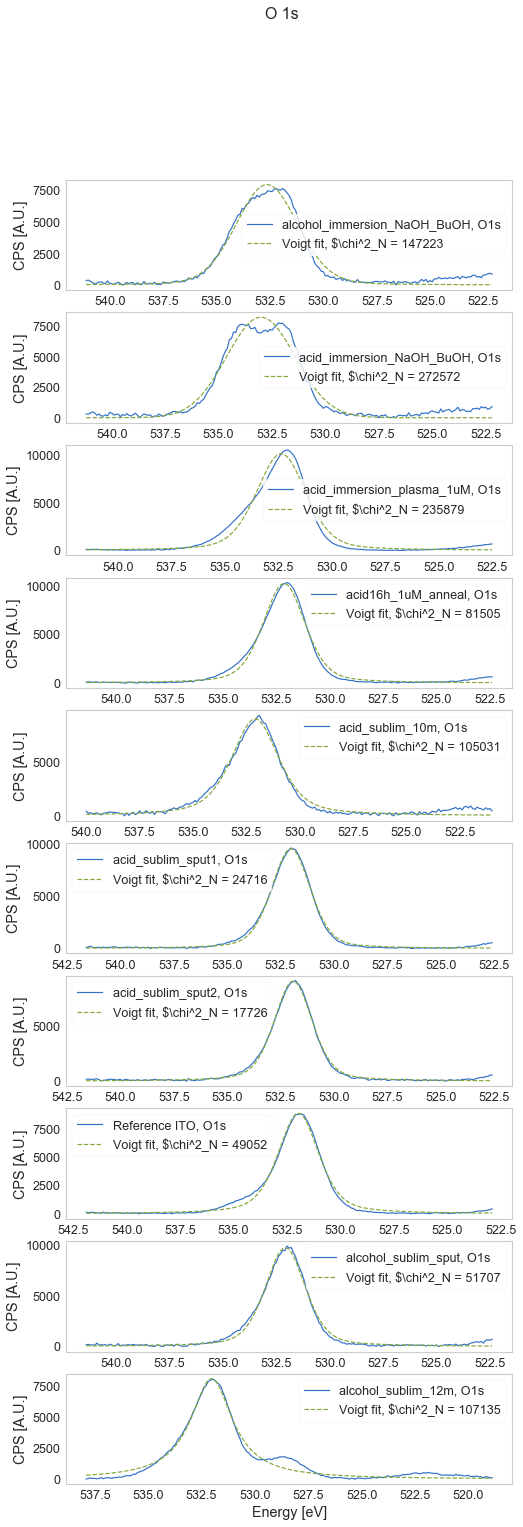

In [30]:
fitv = []
fig, ax = plt.subplots(len(scaled_exps), figsize=(8,24))
for i, xp in enumerate(scaled_exps):
    fitv.append(fit_voigt(xp, region, ax = ax[i]))
    cosmetics_plot(ax = ax[i])
plt.suptitle('O 1s')

### Acid shoulders

In [38]:
fitO = np.zeros((len(main_exps)-1, 4))

In [192]:
plt.rc('font', size= 16)
plt.rc('legend', fontsize= 16)
plt.rc('xtick', labelsize= 15)

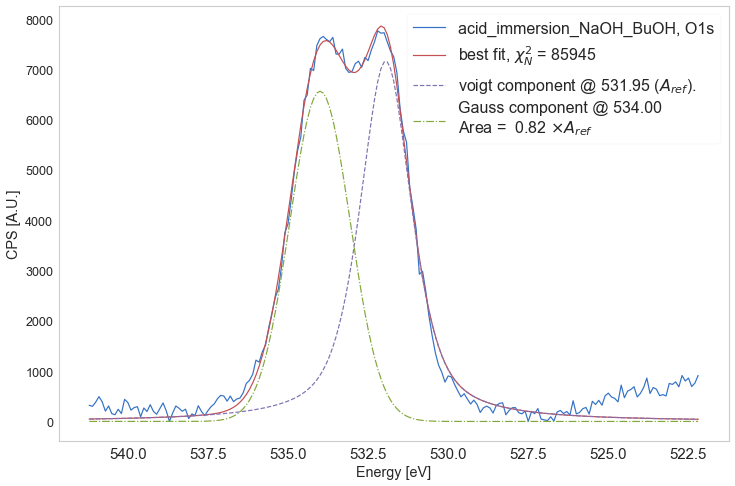

In [181]:
plt.figure(figsize=(12, 8))
par_g = [5e3, 532.5, 1]
bounds_g=[ (7e3, 17e3), (534, 537), (0.8, 1.8)]
fitvg = add_gauss_shoulder(acid_exps[0], region, par_g, bounds_g, fitv[0])
fitO[0] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

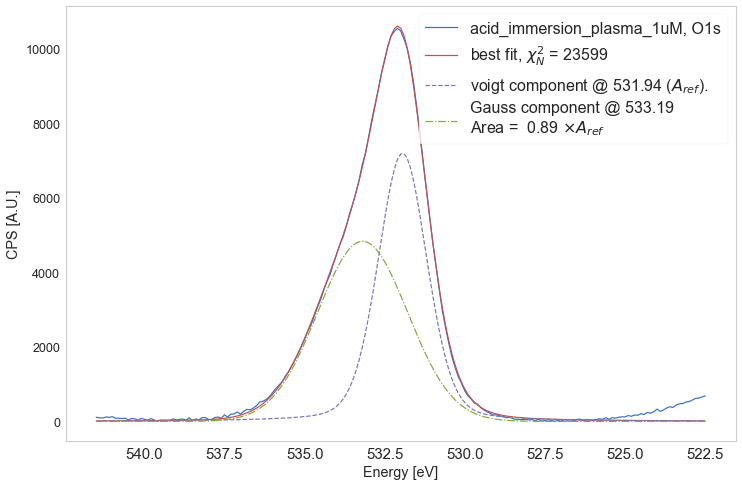

In [182]:
plt.figure(figsize=(12, 8))
par_g = [3.5e4, 534.1, 1]
bounds_g=[ (7e3, 17e3), (532.7, 537), (0.8, 2.8)]
fitvg = add_gauss_shoulder(acid_exps[1], region, par_g, bounds_g, fitv[1])
fitO[1] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

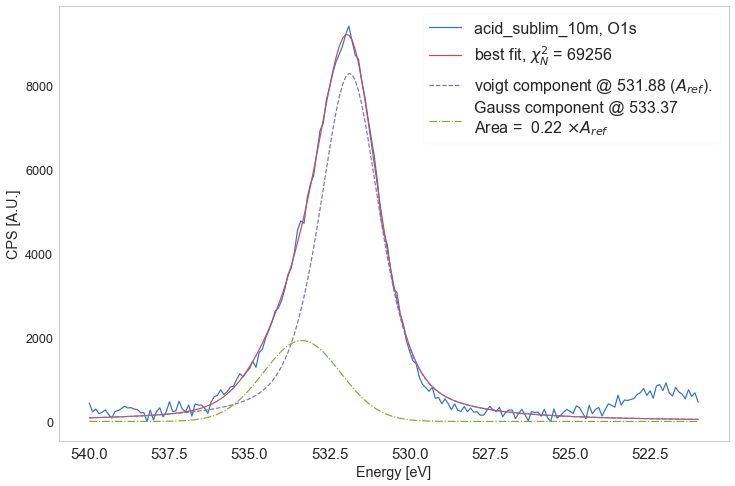

In [183]:
plt.figure(figsize=(12, 8))
par_g = [3.5e3, 534.1, 1]
bounds_g=[ (1e3, 8e3), (532.7, 537), (0.8, 1.2)]
fitvg = add_gauss_shoulder(acid_exps[2], region, par_g, bounds_g, fitv[1])
fitO[2] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

### Alcohol shoulders

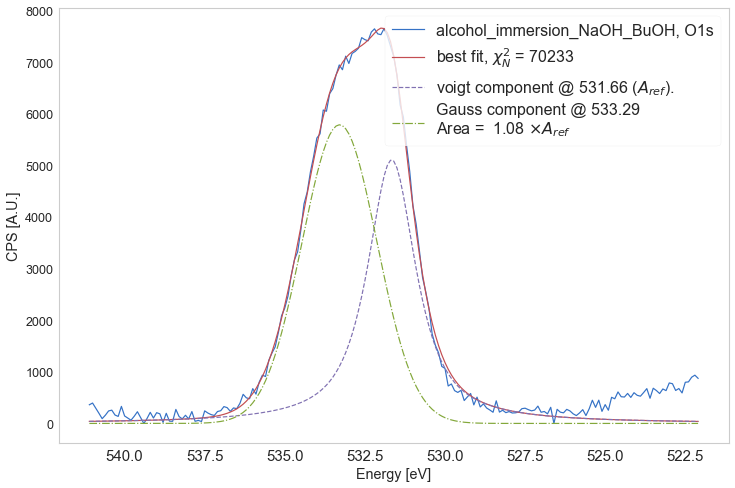

In [188]:
plt.figure(figsize=(12, 8))
par_g = [3.5e4, 534.1, 1]
bounds_g=[ (7e3, 17e3), (532.7, 537), (0.8, 2.8)]
fitvg = add_gauss_shoulder(oh_exps[0], region, par_g, bounds_g, fitv[1])
fitO[3] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm'] ]
cosmetics_plot()

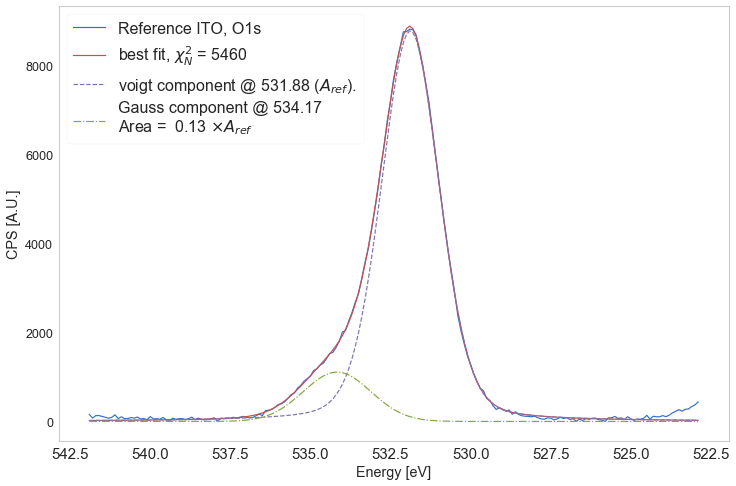

In [200]:
plt.figure(figsize=(12, 8))
par_g = [3.5e3, 534.1, 1]
bounds_g=[ (1e3, 8e3), (532.7, 537), (0.8, 1.2)]
fitvg = add_gauss_shoulder(oh_exps[1], region, par_g, bounds_g, fitv[1])
fitO[4] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

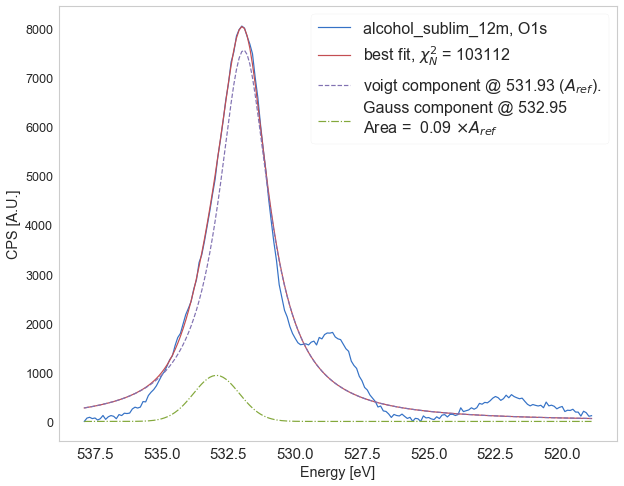

In [186]:
plt.figure(figsize=(10, 8))
par_g = [3.5e3, 534.1, 1]
bounds_g=[ (1e3, 8e3), (532.7, 537), (0.8, 1.2)]
fitvg = add_gauss_shoulder(oh_exps[2], region, par_g, bounds_g, fitv[1])
fitO[5] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

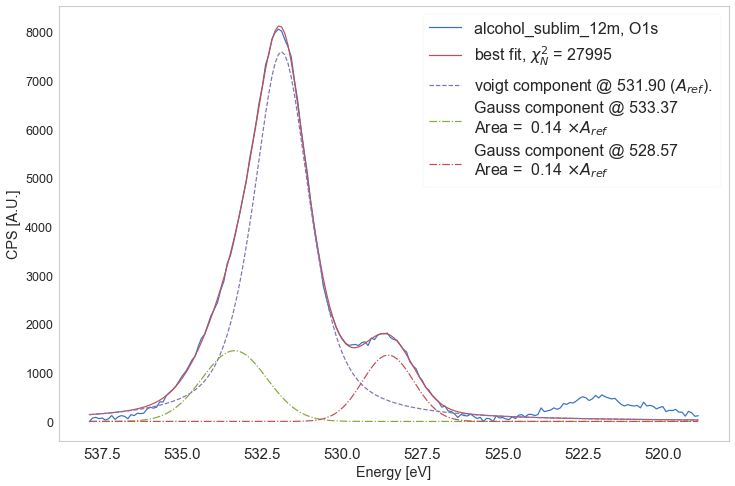

In [203]:
plt.figure(figsize=(12, 8))
par_g = [1.5e3, 528, 1]
bounds_g=[ (1e3, 3e3), (527, 530), (0.8, 1.2)]
fitvgg = add_gauss_shoulder(oh_exps[2], region, par_g, bounds_g, fitvg, Ng=2)
fitO[5] = [fitvgg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

In [166]:
[xp.name for xp in scaled_exps[7:]]

['acid_sublim_plasma', 'alcohol_sublim_sput', 'alcohol_sublim_12m']

In [204]:
fitO

array([[531.94832357,   1.92516173, 534.        ,   2.21286693],
       [531.94199449,   1.79935985, 533.18878743,   3.3009723 ],
       [531.87578874,   2.2451397 , 533.36544247,   2.825784  ],
       [531.66368052,   1.81050084, 533.29143313,   2.75726896],
       [531.8828598 ,   2.14188675, 534.16921646,   2.48123643],
       [531.90245139,   2.1020729 , 533.37105299,   2.38897329]])

### Results

In [150]:
def barplot_fit_fwhm(experiments : list, fit : np.array):
    names = [xp.name for xp in experiments]

    colv = plt.errorbar(x = fit[:,0], y = names, xerr=fit[:,1]/2, fmt='o', mew=2, label='Main component')[0].get_color()
    
    dif = fit [:-1,0] - fit[1:,0]
    for i, d in enumerate(dif) :
        plt.annotate(s = '$\Delta E = $%.2f'%d, xy=(fit[i+1,0], 0.8 * (i+1)), color=colv)
        plt.fill_betweenx(y=(i, i+1), x1=fit[i,0], x2=fit[i+1,0], alpha=0.3, color=colv)
        
    if fit.shape[1] > 2:
        colg = plt.errorbar(x = fit[:,2], y = names, xerr=fit[:,3]/2, fmt='o', mew=2,label='Shoulder')[0].get_color()
        difg = fit [:-1,2] - fit[1:,2]
        for i, d in enumerate(difg) :
            plt.annotate(s = '$\Delta E = $%.2f'%d, xy=(fit[i+1,2], 0.8 * (i+1)), color=colg)
            plt.fill_betweenx(y=(i, i+1), x1=fit[i,2], x2=fit[i+1,2], alpha=0.3, color=colg)
    cosmetics_plot()
    plt.ylabel('')

In [207]:
plt.rc('ytick', labelsize=16)

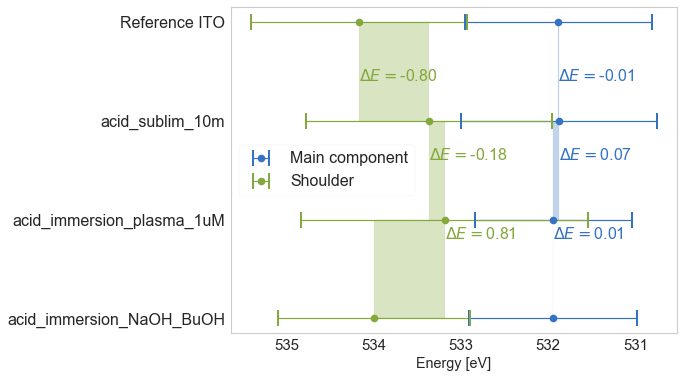

In [208]:
plt.figure(figsize=(8, 6))
fit = np.append(fitO[:3], fitO[4]).reshape(4,4)
exps = [acid_exps + [oh_exps[1]]]
barplot_fit_fwhm(exps[0], fit)

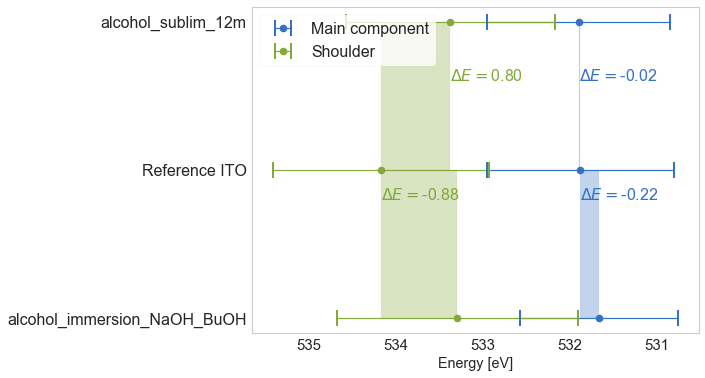

In [209]:
plt.figure(figsize=(8, 6))
barplot_fit_fwhm(oh_exps, fitO[3:])

Text(0, 0.5, '')

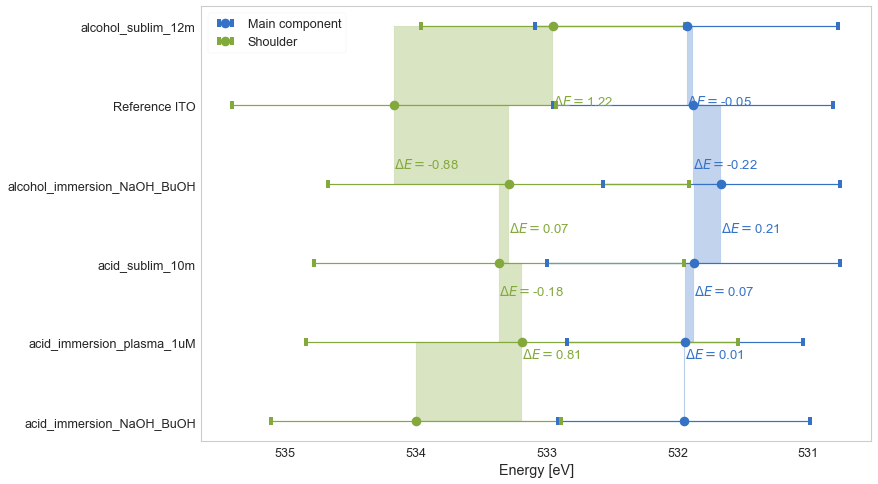

In [98]:
names = [xp.name for xp in acid_exps + oh_exps]
plt.figure(figsize=(12, 8))
colv = plt.errorbar(x = fitO[:,0], y = names, xerr=fitO[:,1]/2, fmt='o', mew=4, label='Main component')[0].get_color()
colg = plt.errorbar(x = fitO[:,2], y = names, xerr=fitO[:,3]/2, fmt='o', mew=4,label='Shoulder')[0].get_color()

dif = fitO [:-1,0] - fitO[1:,0]
for i, d in enumerate(dif) :
    plt.annotate(s = '$\Delta E = $%.2f'%d, xy=(fitO[i+1,0], 0.8 * (i+1)), color=colv)
    plt.fill_betweenx(y=(i, i+1), x1=fitO[i,0], x2=fitO[i+1,0], alpha=0.3, color=colv)
    

difg = fitO [:-1,2] - fitO[1:,2]
for i, d in enumerate(difg) :
    plt.annotate(s = '$\Delta E = $%.2f'%d, xy=(fitO[i+1,2], 0.8 * (i+1)), color=colg)
    plt.fill_betweenx(y=(i, i+1), x1=fitO[i,2], x2=fitO[i+1,2], alpha=0.3, color=colg)
cosmetics_plot()
plt.ylabel('')

## C 1s

In [211]:
region = 'C1s'

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'C 1s')

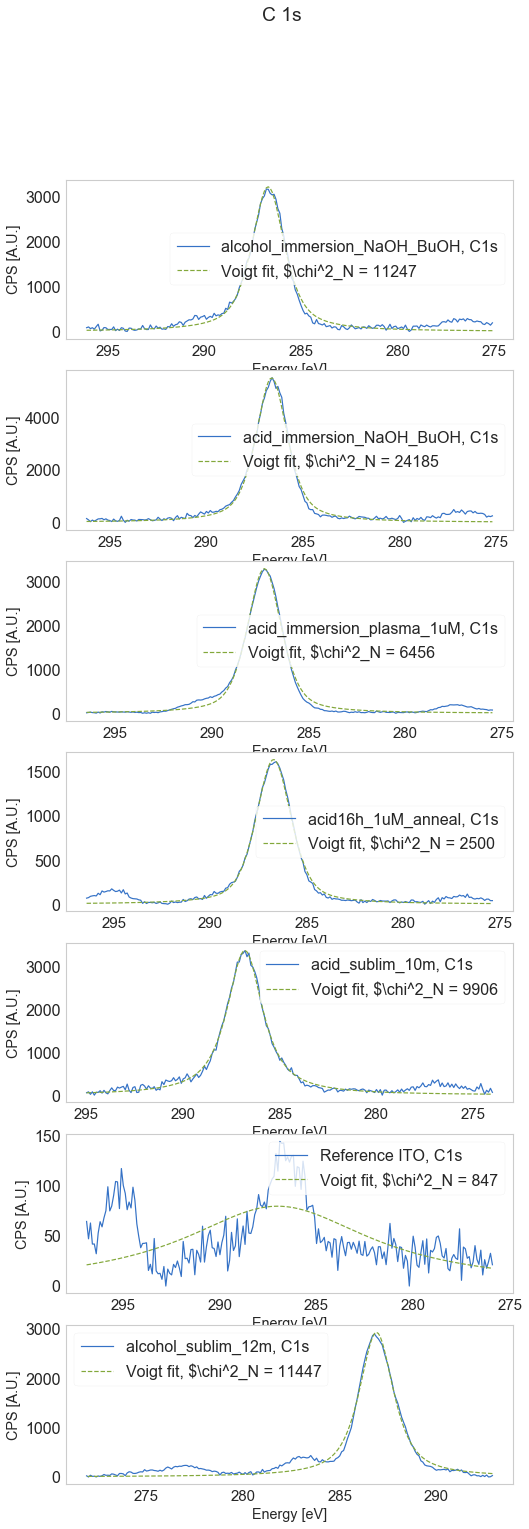

In [223]:
fitv = []
fig, ax = plt.subplots(len(main_exps), figsize=(8,24))
for i, xp in enumerate(main_exps):
    fitv.append(fit_voigt(xp, region, ax = ax[i]))
    cosmetics_plot(ax = ax[i])
plt.suptitle('C 1s')

### Acid shoulders

In [215]:
fitC = np.zeros((len(main_exps)-1, 4))

In [192]:
plt.rc('font', size= 16)
plt.rc('legend', fontsize= 16)
plt.rc('xtick', labelsize= 15)

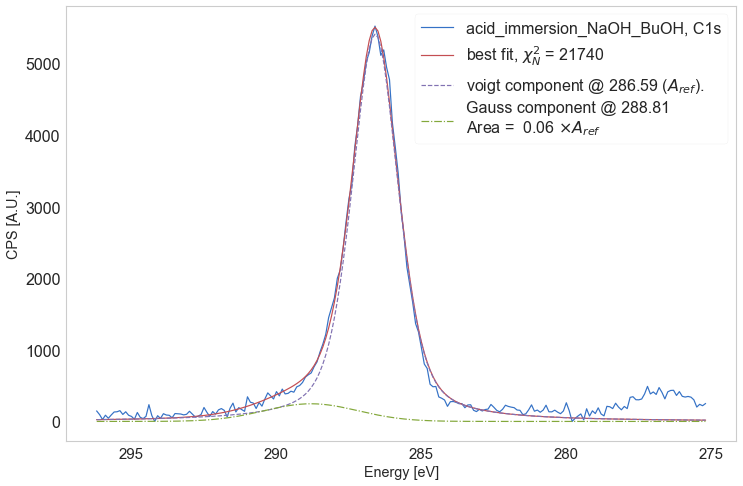

In [219]:
plt.figure(figsize=(12, 8))
par_g = [5e3, 289, 1]
bounds_g=[ (100, 1e3), (287, 291), (0.8, 1.8)]
fitvg = add_gauss_shoulder(acid_exps[0], region, par_g, bounds_g, fitv[0])
fitC[0] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

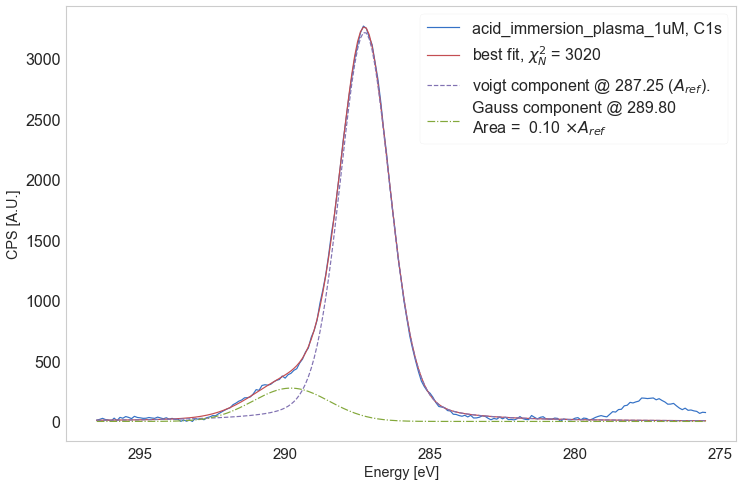

In [224]:
plt.figure(figsize=(12, 8))
par_g = [5e3, 289, 1]
bounds_g=[ (100, 1e3), (287, 291), (0.8, 1.8)]
fitvg = add_gauss_shoulder(acid_exps[1], region, par_g, bounds_g, fitv[1])
fitC[1] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

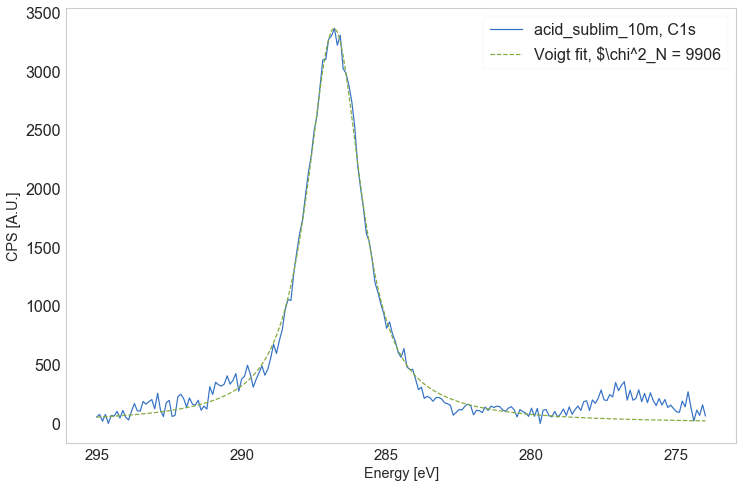

In [229]:
plt.figure(figsize=(12, 8))
fitvg = fit_voigt(acid_exps[2], region)
# fitC[2] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]

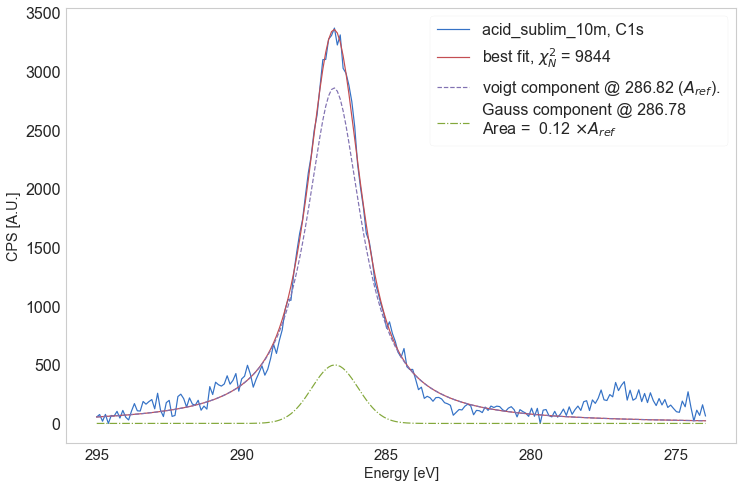

In [226]:
plt.figure(figsize=(12, 8))
par_g = [5e3, 289, 1]
bounds_g=[ (100, 1e3), (285, 291), (0.8, 1.8)]
fitvg = add_gauss_shoulder(acid_exps[2], region, par_g, bounds_g, fitv[2])
fitC[2] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

### Alcohol shoulders

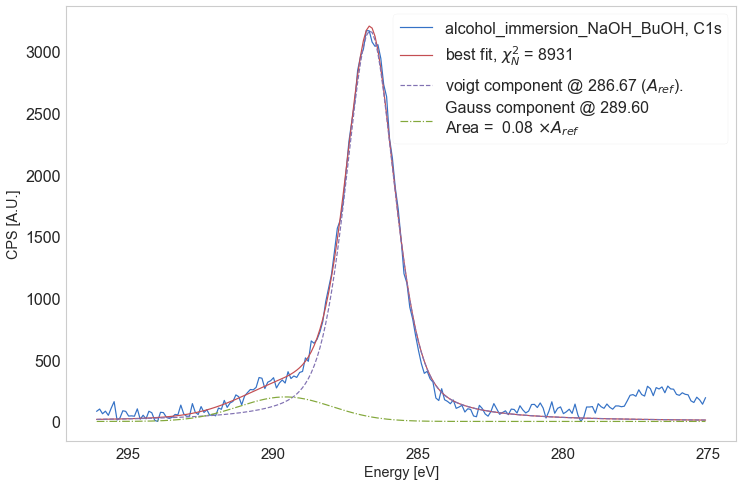

In [230]:
plt.figure(figsize=(12, 8))
par_g = [5e3, 289, 1]
bounds_g=[ (100, 1e3), (287, 291), (0.8, 1.8)]
fitvg = add_gauss_shoulder(oh_exps[0], region, par_g, bounds_g, fitv[1])
fitC[3] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm'] ]
cosmetics_plot()

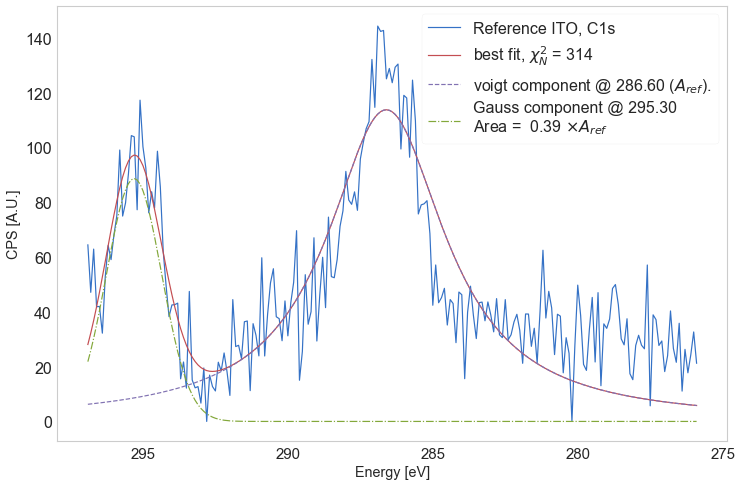

In [232]:
plt.figure(figsize=(12, 8))
par_g = [5e3, 289, 1]
bounds_g=[ (100, 1e3), (287, 299), (0.8, 1.8)]
fitvg = add_gauss_shoulder(oh_exps[1], region, par_g, bounds_g, fitv[1])
fitC[4] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

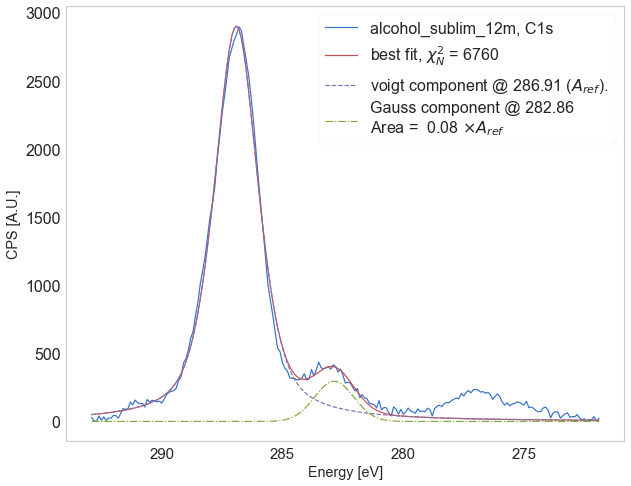

In [235]:
plt.figure(figsize=(10, 8))
par_g = [5e3, 283, 1]
bounds_g=[ (100, 1e3), (282, 285), (0.8, 1.8)]
fitvg = add_gauss_shoulder(oh_exps[2], region, par_g, bounds_g, fitv[1])
fitC[5] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

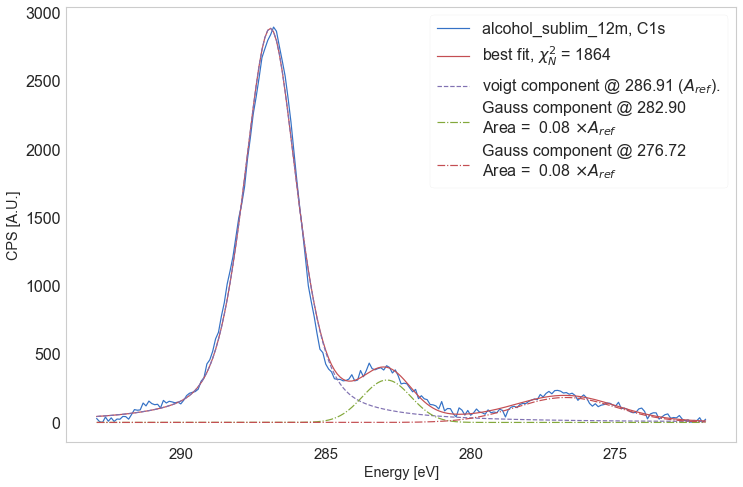

In [236]:
plt.figure(figsize=(12, 8))
par_g = [5e3, 276, 1]
bounds_g=[ (100, 1e3), (275, 280), (0.8, 1.8)]
fitvgg = add_gauss_shoulder(oh_exps[2], region, par_g, bounds_g, fitvg, Ng=2)
fitC[5] = [fitvgg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()

### Results

In [8]:
print('C/O', 'In/Sn', 'In/O')
print(14/2, 13/1, 74/8, 74/18)


C/O In/Sn In/O
7.0 13.0 9.25 4.111111111111111


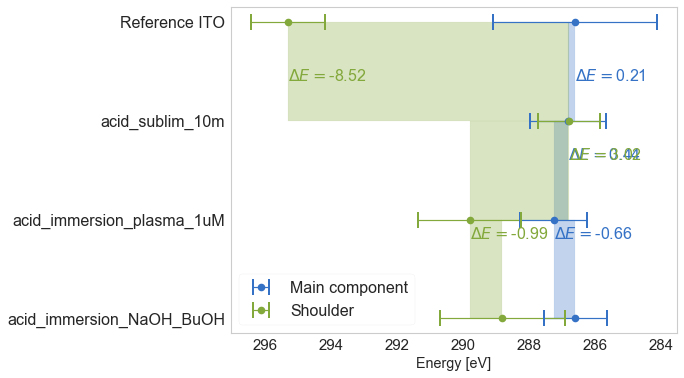

In [239]:
plt.figure(figsize=(8, 6))
fit = np.append(fitC[:3], fitC[4]).reshape(4,4)
exps = [acid_exps + [oh_exps[1]]]
barplot_fit_fwhm(exps[0], fit)

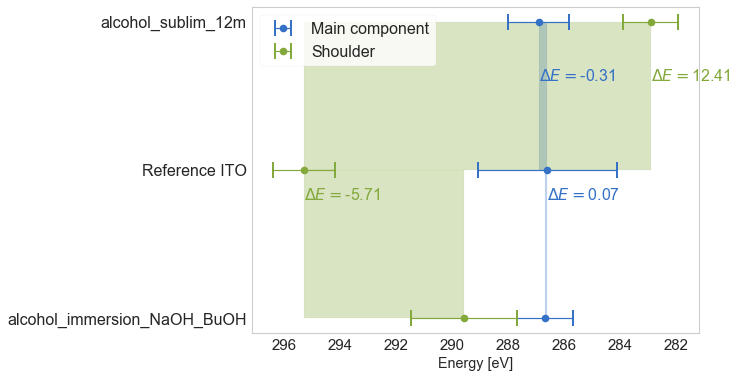

In [240]:
plt.figure(figsize=(8, 6))
barplot_fit_fwhm(oh_exps, fitC[3:])

## N 1s

In [115]:
region = 'N1s'

In [42]:
crop_exps= []
for xp in main_exps:
    crop_exps.append(crop_spectrum(xp = xp, xpRef = scaled_exps[2], region = 'N1s'))

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


No handles with labels found to put in legend.
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/lmfit/models.py:34: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return np.abs(arr-val).argmin()
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'C 1s')

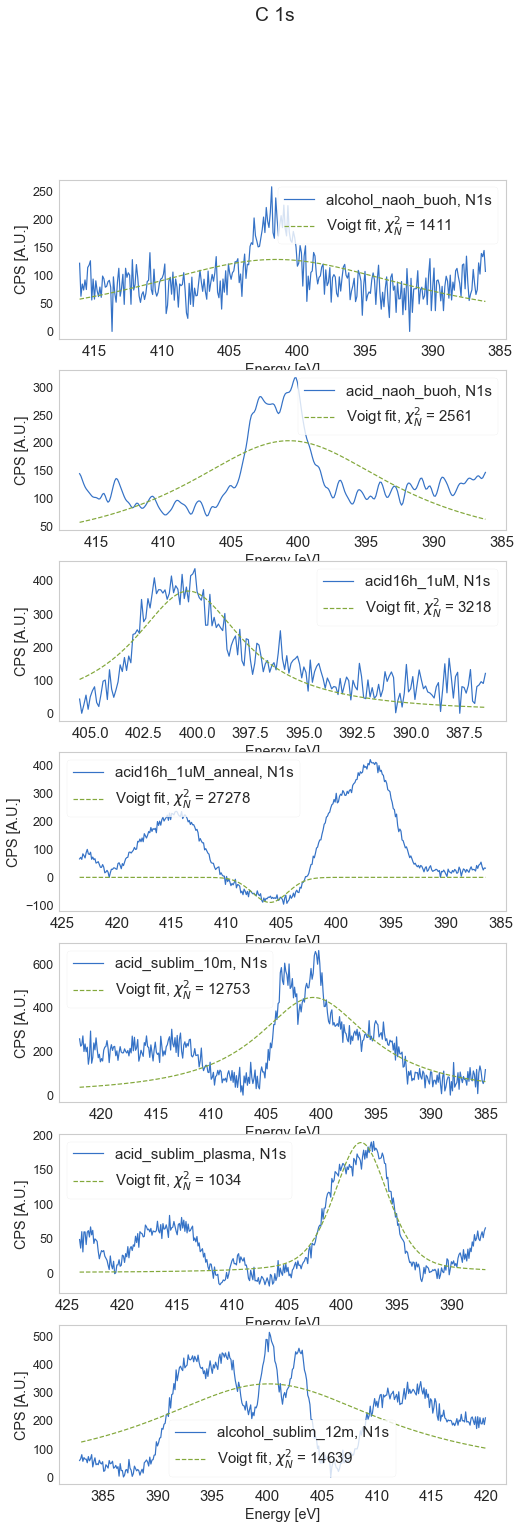

In [43]:
fitv = []
fig, ax = plt.subplots(len(main_exps), figsize=(8,24))
for i, xp in enumerate(main_exps):
    fitv.append(fit_voigt(xp, region, ax = ax[i]))
    cosmetics_plot(ax = ax[i])
plt.suptitle('C 1s')

### Acid shoulders

In [44]:
fitN = np.zeros((len(main_exps)-1, 4))

In [266]:
x = acid_exps[0].dfx[region].dropna().energy
y = acid_exps[0].dfx[region].dropna().counts
sepPt = find_separation_point(x, y)
from lmfit.models import PseudoVoigtModel, GaussianModel, ConstantModel
x1 = x[x<sepPt].values
x2 = x[x>sepPt].values
y1 = y[x<sepPt].values
y2 = y[x>sepPt].values

mod1 = GaussianModel(prefix='v1_')
mod2 = GaussianModel(prefix='v2_')

pars1 = mod1.guess(y1, x=x1)
pars1['v1_sigma'].set(value=1) # Usually guessed wrong anyway
pars1['v1_amplitude'].set(value=300)
pars2 = mod2.guess(y2, x=x2)
pars2['v2_sigma'].set(value=1) # Usually guessed wrong anyway
pars2['v2_amplitude'].set(value=300)

mod = mod1 + mod2 + ConstantModel()
pars = mod.make_params()

for p1,p2 in zip(pars1.values(), pars2.values()):
    pars[p1.name].set(value=p1.value, min=p1.value*0.1, max=p1.value*1.1)
    pars[p2.name].set(value=p2.value, min=p2.value*0.1, max=p2.value*1.1)
pars['v1_center'].set(max=sepPt)
pars['v2_center'].set(min=sepPt)
# fit2 = mod2.fit(y2, x=x2, params=pars2)
# ax.plot(x1, fit1.best_fit, '--', label='Fit first Voigt')
# ax.plot(x2, fit2.best_fit, '--', label='Fit second Voigt')

fit = mod.fit(y, x=x, params=pars)

In [289]:
x = acid_exps[0].dfx[region].dropna().energy
y = acid_exps[0].dfx[region].dropna().counts
sepPt = find_separation_point(x, y)
from lmfit.models import PseudoVoigtModel, GaussianModel, ConstantModel
x1 = x[x<sepPt].values
x2 = x[x>sepPt].values
y1 = y[x<sepPt].values
y2 = y[x>sepPt].values

mod1 = PseudoVoigtModel(prefix='v1_')
mod2 = PseudoVoigtModel(prefix='v2_')

pars1 = mod1.guess(y1, x=x1)
pars1['v1_sigma'].set(value=1) # Usually guessed wrong anyway
pars2 = mod2.guess(y2, x=x2)
pars2['v2_sigma'].set(value=1) # Usually guessed wrong anyway
pars1 = check_pars_amplitud(pars1,'v1_', x, y)
pars2 = check_pars_amplitud(pars2, 'v2_', x, y)

mod = mod1 + mod2 + ConstantModel()
pars = mod.make_params()
for p1,p2 in zip(pars1.values(), pars2.values()):
    pars[p1.name].set(value=p1.value, min=p1.value*0.1, max=p1.value*1.1)
    pars[p2.name].set(value=p2.value, min=p2.value*0.1, max=p2.value*1.1)
pars['v1_center'].set(max=sepPt)
pars['v2_center'].set(min=sepPt)
# fit2 = mod2.fit(y2, x=x2, params=pars2)
# ax.plot(x1, fit1.best_fit, '--', label='Fit first Voigt')
# ax.plot(x2, fit2.best_fit, '--', label='Fit second Voigt')

fitv = mod.fit(y, x=x, params=pars)

In [290]:
pars1['v1_amplitude'].value
fit

In [282]:
def check_pars_amplitud(pars, prefix : str, x : np.array, y : np.array):
    if pars[prefix + 'amplitude'] < 0 :
        amp = y[np.where(x == pars[prefix + 'center'].value)[0][0]]
        pars[prefix + 'amplitude'].set(value=amp)
    return pars

No handles with labels found to put in legend.


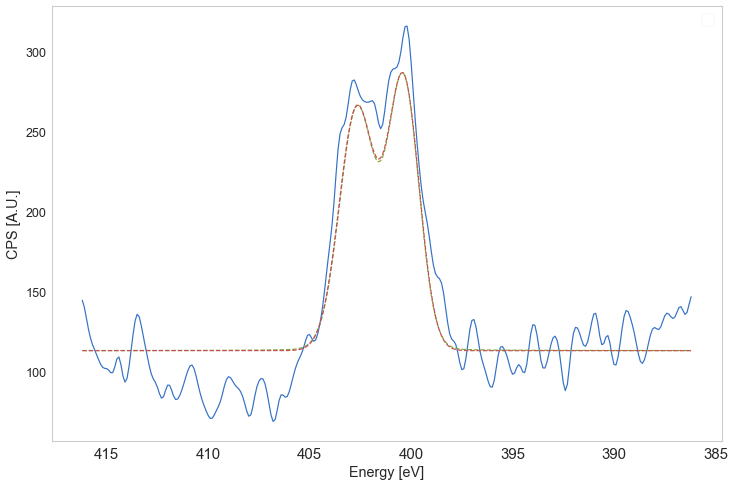

In [267]:
plt.figure(figsize=(12, 8))
par_g = [200, 403, 1]
bounds_g=[ (100, 400), (400, 405), (0.8, 1.8)]
# fitvg = fit_double_voigt(acid_exps[0], region)

# fitvg = add_gauss_shoulder(acid_exps[0], region, par_g, bounds_g, fitv[0])
# fitN[0] = [fitvg.params[p].value for p in ['v_center', 'v_fwhm', 'g1_center', 'g1_fwhm']]
cosmetics_plot()
plt.plot(x, y)
plt.plot(x, fitv.best_fit, '--', label='Fit to double Voigt')
plt.plot(x, fit.best_fit, '--', label='Fit to double Gauss')